## Assignment 2: Text Clustering
### By: Group 11

### Step 1: Dataset Creation and preprocessing of Data

##### For our dataset we have chosen seven books from the genre crime fiction/murder mystery
##### The names of selected books are: 
- Murder in the Gunroom
- The Crime Club
- The Devil Doctor
- The House of Arrow
- The Mystery of Blue Train
- The Wrong Letter
- Time Crime

In [3]:
#importing libraries
import os
import re
import random
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [4]:
# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/kish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
'''The following fuction will take text from books and remove the word capitalization,
unwanted characters, white spaces, and stop words.'''
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove unwanted characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove white spaces
    text = text.strip()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Join words back into text
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [6]:
# Function to apply lemmatization and tokenization
def lemmatize_and_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [7]:
'''The following function will take the preprocessed data 
and create 200 documents with 150 words each'''
def create_samples(text, num_samples=200, words_per_sample=150):
    samples = []
    words = text.split()
    
    # Calculate maximum number of samples that can be created
    max_samples = len(words) // words_per_sample
    
    if max_samples < num_samples:
        print(f"Not enough words to create {num_samples} samples. Creating {max_samples} samples instead.")
        num_samples = max_samples
    
    # Create samples
    for i in range(num_samples):
        start_index = random.randint(0, len(words) - words_per_sample)
        sample = ' '.join(words[start_index:start_index + words_per_sample])
        samples.append(sample)
    
    return samples

In [8]:
# Function to process books
def process_books(book_paths):
    df_data = []
    
    for book_path in book_paths:

        book_name = os.path.basename(book_path)
        # Preprocess the book
        with open(book_path, 'r', encoding='utf-8') as f:
            text = f.read()
            preprocessed_text = preprocess_text(text)
        
        # remove the word capitalization, unwanted characters, white spaces, and stop words and 
        # save preprocessed book as book_name_data.txt
        preprocessed_file = os.path.splitext(book_path)[0] + "_data.txt"
        with open(preprocessed_file, 'w', encoding='utf-8') as f:
            f.write(preprocessed_text)
        
        # Apply lemmatization and tokenization 
        lemmatized_text = lemmatize_and_tokenize(preprocessed_text)
        
        # Save the books after lemmatization is done as book_name_lemmatized.txt
        lemmatized_file = os.path.splitext(book_path)[0] + "_lemmatized.txt"
        with open(lemmatized_file, 'w', encoding='utf-8') as f:
            f.write(lemmatized_text)
        
        # Create samples for each book using create_samples function
        print(book_name)
        samples = create_samples(lemmatized_text)
        
        # Add samples to DataFrame
        for sample in samples:
            df_data.append((sample, book_name))

    
    # Create DataFrame
    df = pd.DataFrame(df_data, columns=['Sample', 'Book_Name'])
    
    return df

#### After creating 200 samples from all the books, they are stored in a csv file called 'book_samples.csv'. This file contains the clean, tokenized and lemmatized text. The csv file is created with labels. The labels are books names. 

In [9]:

# Paths to input TXT files for seven books for preprocessing
book_paths = [
    "Dataset/Murder in the Gunroom.txt",
    "Dataset/The Crime Club.txt",
    "Dataset/The Devil Doctor.txt",
    "Dataset/The House of Arrow.txt",
    "Dataset/The Wrong Letter.txt",
    "Dataset/The mystery of blue train.txt",
    "Dataset/Time Crime.txt"
]
    
# Process books
df = process_books(book_paths)
    
# Display DataFrame
print(df)
print(df['Book_Name'].unique())
print("----")
    
# Save DataFrame to CSV file
df.to_csv('book_samples.csv', index=False)

Murder in the Gunroom.txt
The Crime Club.txt
The Devil Doctor.txt
The House of Arrow.txt
The Wrong Letter.txt
Not enough words to create 200 samples. Creating 127 samples instead.
The mystery of blue train.txt
Time Crime.txt
Not enough words to create 200 samples. Creating 127 samples instead.
                                                 Sample  \
0     place ritter added know possible somebody else...   
1     war year till get caught last one rand looking...   
2     said jefferson davis rand said david abercromb...   
3     lack confidence state police afraid party migh...   
4     appear assumed tub splashing soapsuds around l...   
...                                                 ...   
1249  plantation manager nodded kiro soran knew must...   
1250  nodded didnt think petty larceny said wait til...   
1251  back slowly threethousandton passenger ship ha...   
1252  fifth level passenger industrial sector servic...   
1253  finished tour warehouse looking keg gunpowder ... 

#### Generating WordCloud to visualize text for each book

In [10]:
# Load the CSV file into a DataFrame
df = pd.read_csv('book_samples.csv')

# Initialize an empty dictionary to store book texts
book_texts = {}

In [11]:
# Iterate over each book
for book_num in range(1, 8):
    if book_num == 1: 
        rand_start = 2
        rand_end = 201
    elif book_num == 2: 
        rand_start = 202
        rand_end = 401
    elif book_num == 3: 
        rand_start = 402
        rand_end = 601
    elif book_num == 4: 
        rand_start = 602
        rand_end = 801
    elif book_num == 5: 
        rand_start = 802
        rand_end = 928
    elif book_num == 6: 
        rand_start = 929
        rand_end = 1128
    elif book_num == 7: 
        rand_start = 1129
        rand_end = 1255
    
    # Get a random row index for the current book
    random_index = random.randint(rand_start, rand_end)
    
    # Get the sample text for the selected row
    sample_text = df.iloc[random_index]['Sample']
    
    # Store the sample text for the current book
    book_texts[f'Book {book_num}'] = sample_text

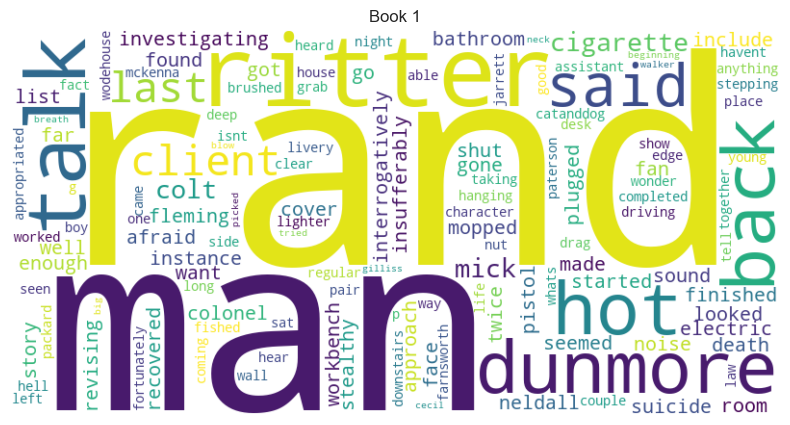

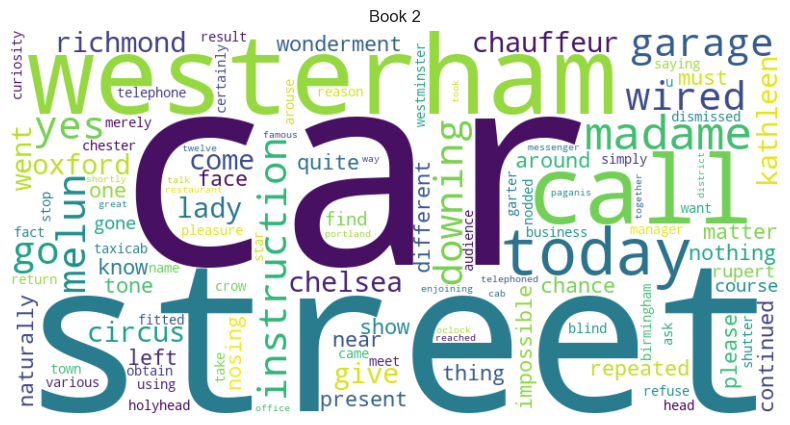

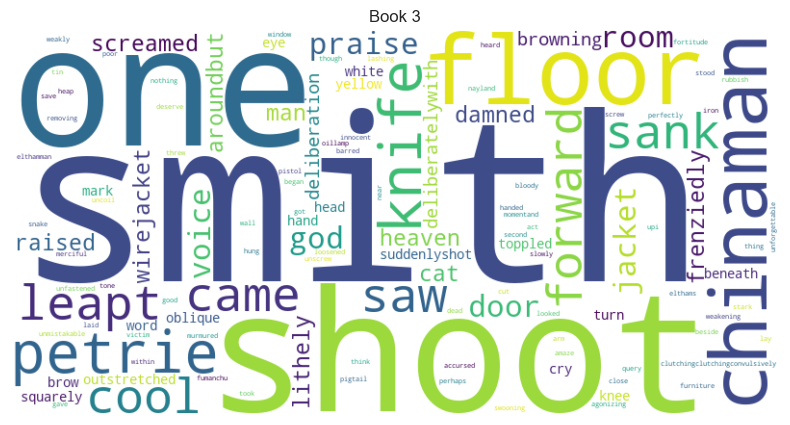

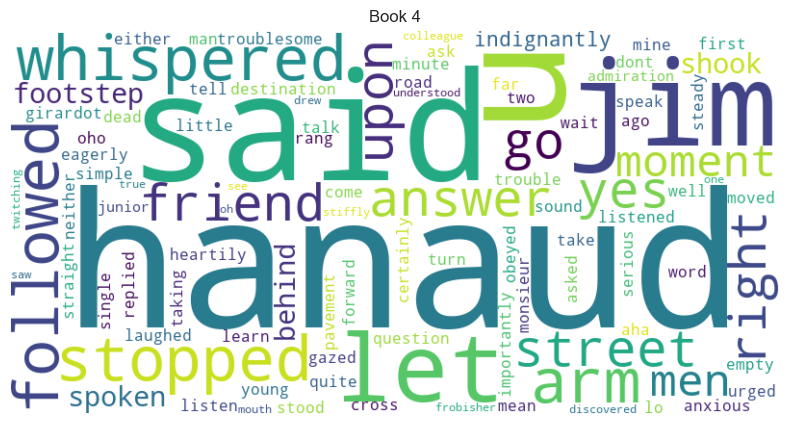

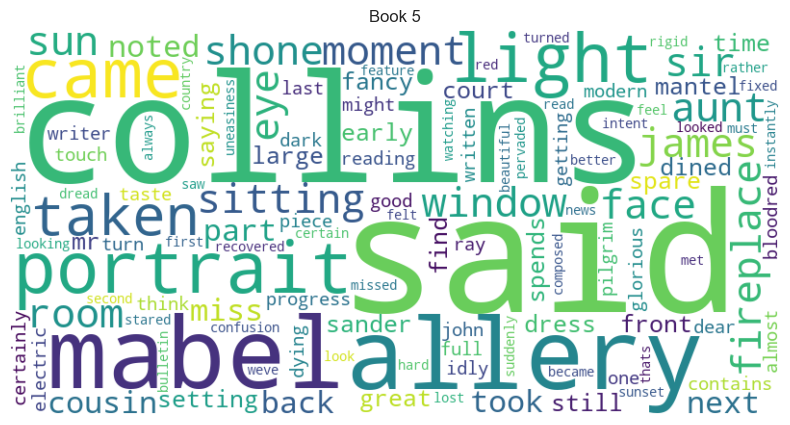

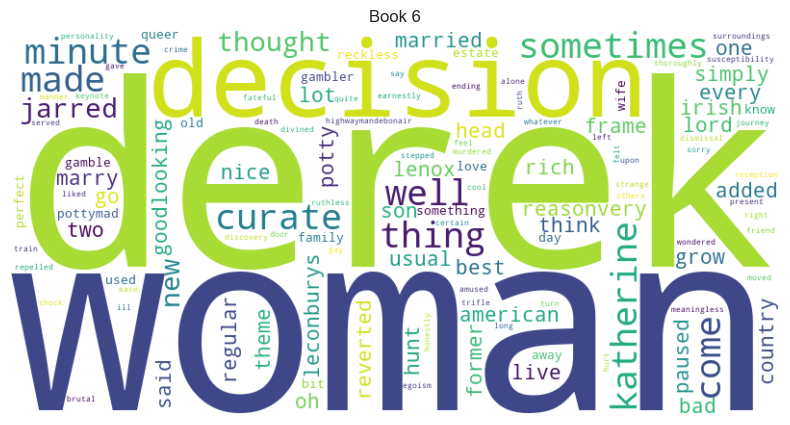

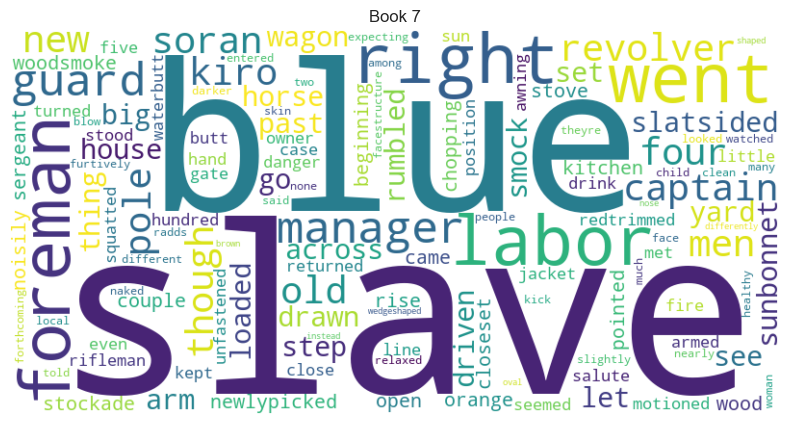

In [12]:
# Generate word clouds for each book
for book_name, book_text in book_texts.items():
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(book_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(book_name)
    plt.axis('off')
    plt.show()

#### Once we have the final csv file - 'book_samples.csv',  we then shuffle the data, and encode it by removing name of the books and replacing it number labels. The output file is saved as 'encoded_books_data.csv'

In [13]:
# Read data from CSV file
data = pd.read_csv('book_samples.csv')

# Shuffle the data
data_shuffled = shuffle(data,random_state=42)

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y_actual= label_encoder.fit_transform(data_shuffled['Book_Name'])
data_shuffled['Book_Name']=y_actual

# Write the processed data to a new CSV file
data_shuffled.to_csv('encoded_books_data.csv', index=False)

print("Data processing completed and saved to processed_data.csv")

Data processing completed and saved to processed_data.csv


### Step 2: Word Embediing and Visualization (Feature Engineering)

#### Word Embedding

##### Word Embeddings in NLP is a technique where individual words are represented as real-valued vectors in a lower-dimensional space and captures inter-word semantics. Each word is represented by a real-valued vector with tens or hundreds of dimensions.

##### The word Embedding techniques used are:
- Bag of Words (BOW)
- TF-IDF 
- Doc2vec
- LDA

In [14]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import gensim
import pickle

##### BOW and TF-IDF

##### BOW: A bag of words is one of the popular word embedding techniques of text where each value in the vector would represent the count of words in a document/sentence. In other words, it extracts features from the text. We also refer to it as vectorization.

##### TF-IDF: Term frequency-inverse document frequency is the machine learning algorithm that is used for word embedding for text. It comprises two metrics, namely term frequency (TF) and inverse document frequency (IDF).

##### This algorithm works on a statistical measure of finding word relevance in the text that can be in the form of a single document or various documents that are referred to as corpus.

##### The term frequency (TF) score measures the frequency of words in a particular document. In simple words, it means that the occurrence of words is counted in the documents.

In [15]:
# Load the processed data
data_frame = pd.read_csv('encoded_books_data.csv')

# Bag of Words (BoW) - CountVectorizer
BOW = CountVectorizer()
BOW_transformation = BOW.fit_transform(data_frame['Sample'])

# TF-IDF
def tfidf_ngram(n_gram,X_train=data_frame['Sample']):
    vectorizer = TfidfVectorizer(ngram_range=(n_gram,n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    return x_train_vec

# Applying tfidf with 1-gram, and 2-gram
tfidf_1g_transformation= tfidf_ngram(1,X_train=data_frame['Sample'])
tfidf_2g_transformation= tfidf_ngram(2,X_train=data_frame['Sample'])


##### Doc2Vec

##### Doc2Vec is a neural network-based approach that learns the distributed representation of documents. It is an unsupervised learning technique that maps each document to a fixed-length vector in a high-dimensional space. 

##### The vectors are learned in such a way that similar documents are mapped to nearby points in the vector space. This enables us to compare documents based on their vector representation and perform tasks such as document classification, clustering, and similarity analysis..

In [16]:
# Doc2Vec
# Tokenization of each document
tokenized_doc = []
for d in data_frame['Sample']:
    tokenized_doc.append(word_tokenize(d.lower()))

# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_doc)]
tagged_data[0]
# Train doc2vec model
model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs = 100)
def get_doc2vec_vector(df):
    doc2vec_vectors=[]
    for sentence in data_frame['Sample']:
        doc2vec_vectors.append(model.infer_vector(word_tokenize(sentence.lower())))
    return doc2vec_vectors
doc2vec_vectors=get_doc2vec_vector(data_frame['Sample'])
len(doc2vec_vectors)

1254

##### LDA

##### Latent Dirichlet Allocation (LDA) is a popular form of statistical topic modeling. In LDA, documents are represented as a mixture of topics and a topic is a bunch of words. Those topics reside within a hidden, also known as a latent layer.

In [17]:
#LDA
paragraphs = data_frame["Sample"].to_list()
docs = []

for sen in paragraphs:
    docs.append(list(sen.split()))
print(len(docs))

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.8)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print(len(corpus[2]))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

# Set training parameters.
num_topics = 7
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token
#print(len(dictionary))
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

all_topics = model.get_document_topics(corpus)
num_docs = len(all_topics)

all_topics_csr = gensim.matutils.corpus2csc(all_topics)
lda_to_cluster = all_topics_csr.T.toarray()
lda_to_cluster.shape

from gensim.models.coherencemodel import CoherenceModel
## Evaluating coherence of gensim LDA model
cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence_score = cm.get_coherence()
print(coherence_score)

1254
87
Number of unique tokens: 1518
Number of documents: 1254
Average topic coherence: -1.5314.
-1.5314281367147102


##### Saving the results from all transformations in a dictionary

In [18]:
# Save the results
text_embedding={
    'BOW':BOW_transformation.toarray(),
    'TF_IDF 1_gram':tfidf_1g_transformation.toarray(),
    'Doc2vec':np.array(doc2vec_vectors),
    'LDA':lda_to_cluster,
}

#### Word Embedding Visualization

In [19]:
# %pip install gdown
# %gdown --id 1ajm_Az1wn16aI9b8kD1ao3efRiB1KJCz
# %gdown --id 1XBbRmnhaI17OLh2FqhUdQdn2rq2KJJIq

In [20]:
import plotly.express as px
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()

for key in embedding.keys():
  embedding[key]=pca.fit_transform(embedding[key])
  df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':y_actual})
  fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
  fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=700)
  fig.show()

### Step 3: Clustering

#### Clustering is the task of dividing the unlabeled data or data points into different clusters such that similar data points fall in the same cluster than those which differ from the others. In simple words, the aim of the clustering process is to segregate groups with similar traits and assign them into clusters.

#### The Clustering Algorithms used are as follows:
- K-Means
- Expectation Maximization (EM)
- Hierarchical Clustering

#### 1. K-Means Clustering

#### K-means clustering is a widely used method for cluster analysis where the aim is to partition a set of objects into K clusters in such a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized.

In [22]:
#importing libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
from sklearn.metrics import cohen_kappa_score
warnings.filterwarnings('ignore')

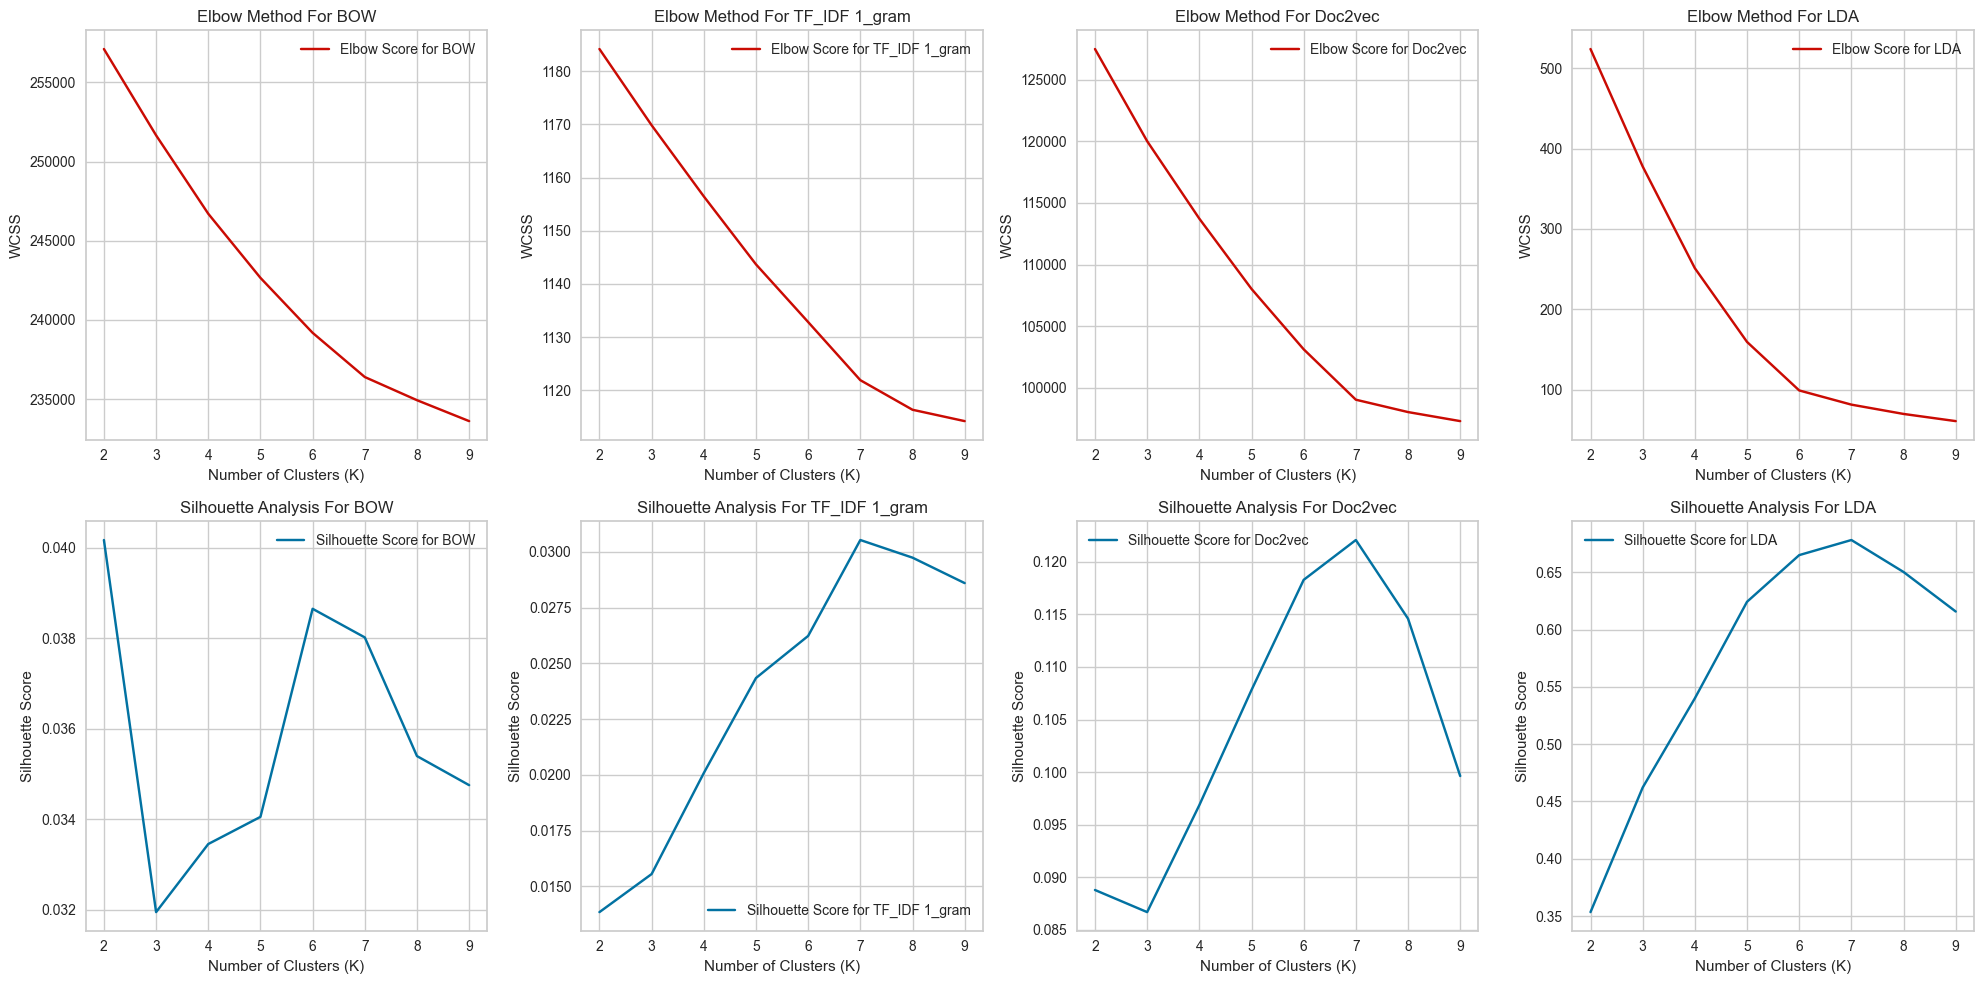

In [23]:
'''This code loops over data in text_embedding and calculates elbow score and 
silhouette score for clusters in range 2 to 10. This data is then plotted in a line graph.'''
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize dictionaries to store elbow and silhouette scores
kmeans_elb_vec = {}
kmeans_sil_vec = {}
optimal_clusters = {}
clusters = 10

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for idx, (k, x_kmeans) in enumerate(text_embedding.items()):
    silhouette_scores = []
    elbow_scores = []
    silhouette_score_val = np.zeros((clusters-2))
    optimal_silhouette_score = -1  # Initialize the optimal silhouette score
    optimal_k_value = -1  # Initialize the corresponding K value

    # Calculate silhouette score and elbow score for different number of clusters
    for i in range(2, clusters):
        kmeans_classifier = KMeans(n_clusters=i,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=500,
                                   random_state=42,
                                   algorithm='elkan')
        label_kmeans = kmeans_classifier.fit_predict(x_kmeans)
        silhouette_score_val = silhouette_score(x_kmeans, label_kmeans)
        if silhouette_score_val > optimal_silhouette_score:
            optimal_silhouette_score = silhouette_score_val
            optimal_k_value = i

        silhouette_scores.append(silhouette_score_val)
        elbow_scores.append(kmeans_classifier.inertia_)

    optimal_clusters[k] = (optimal_silhouette_score, optimal_k_value)

    # Store silhouette and elbow scores in the respective dictionaries
    kmeans_elb_vec[k] = elbow_scores
    kmeans_sil_vec[k] = silhouette_scores
    

    # Plot elbow score against the number of clusters on axes[0, idx]
    axes[0, idx].plot(range(2, clusters), elbow_scores, 'rx-', label='Elbow Score for {}'.format(k))
    axes[0, idx].set_xlabel('Number of Clusters (K)')
    axes[0, idx].set_ylabel('WCSS')
    axes[0, idx].set_title('Elbow Method For {}'.format(k))
    axes[0, idx].legend()
    axes[0, idx].grid(True)

    # Plot silhouette score against the number of clusters on axes[1, idx]
    axes[1, idx].plot(range(2, clusters), silhouette_scores, 'bx-', label='Silhouette Score for {}'.format(k))
    axes[1, idx].set_xlabel('Number of Clusters (K)')
    axes[1, idx].set_ylabel('Silhouette Score')
    axes[1, idx].set_title('Silhouette Analysis For {}'.format(k))
    axes[1, idx].legend()
    axes[1, idx].grid(True)

plt.tight_layout()
plt.show()

#### Elbow Method: 

#### The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.

#### After analysising the above graphs for Elow score and Silhouette Score, we get the following data:
#### Best K using Elbow Method: 
- BOW: K = 7
- TF_IDF 1_gram: K = 7 
- Doc2Vec: K = 7
- LDA: K = 6

#### Champion Model Using ELbow Method: BOW, TF_IDF 1_gram, Doc2vec


#### Silhouette Score: 

#### The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

#### Sihouette Score Visualizer

BOW


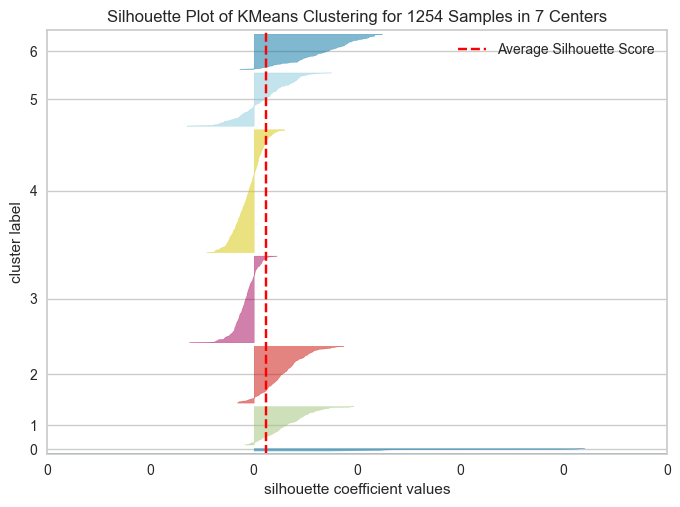

Silhoutte Score = 0.012
TF_IDF 1_gram


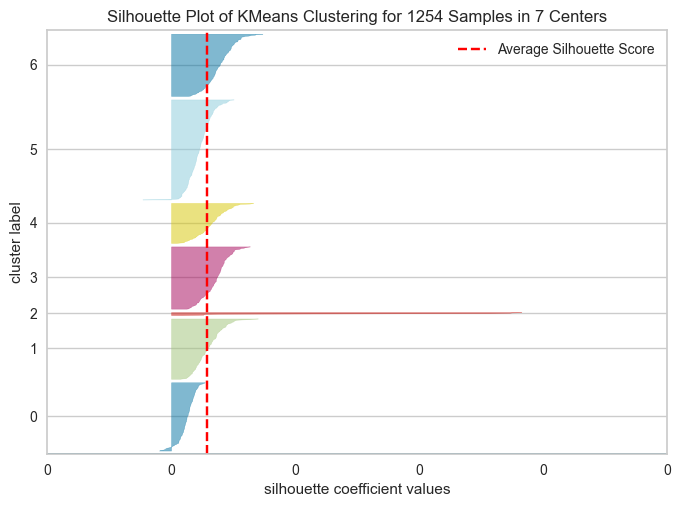

Silhoutte Score = 0.029
Doc2vec


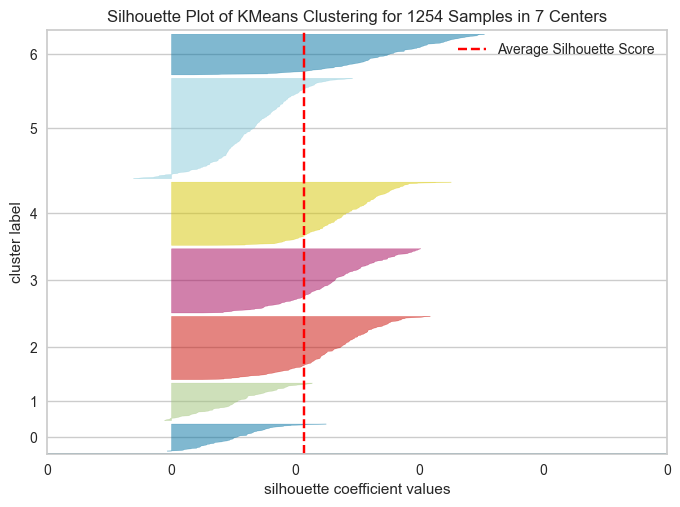

Silhoutte Score = 0.107
LDA


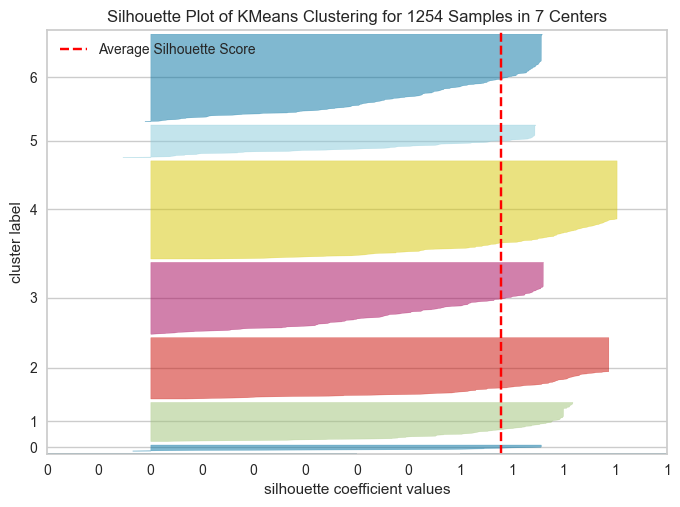

Silhoutte Score = 0.678


In [26]:
import numpy as np
from sklearn.datasets import make_blobs


for k in text_embedding.keys():

    X = text_embedding[k]
    print(k)

    # Train a Kmeans instance
    kmeans = KMeans(n_clusters=7, random_state=42).fit(X)

    # Instantiate the clustering model and visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()

    # Compute silhouette score
    silhouette = silhouette_score(X, kmeans.labels_) 
    print("Silhoutte Score = {:.3f}".format(silhouette))

In [32]:
for k in text_embedding.keys():
   print(k)
   value = optimal_clusters[k][0]
   k_value = optimal_clusters[k][1]
   print( "The best silhouette score was", value, "with k =", k_value)

BOW
The best silhouette score was 0.040172840427648134 with k = 2
TF_IDF 1_gram
The best silhouette score was 0.03053740512322161 with k = 7
Doc2vec
The best silhouette score was 0.12205723 with k = 7
LDA
The best silhouette score was 0.6782469363737805 with k = 7


#### Champion Model using Silhouette Score: LDA 

#### Countplot to check number of samples in each cluster

BOW


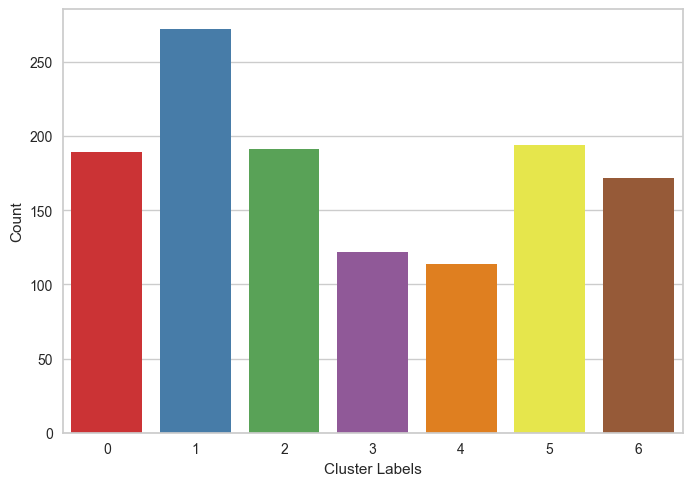

TF_IDF 1_gram


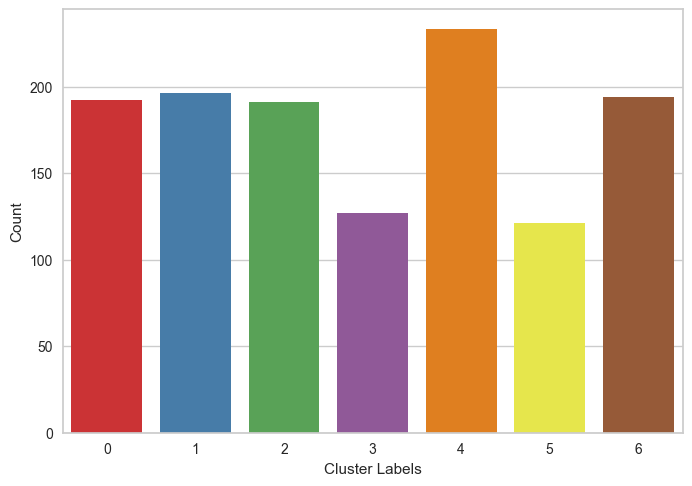

Doc2vec


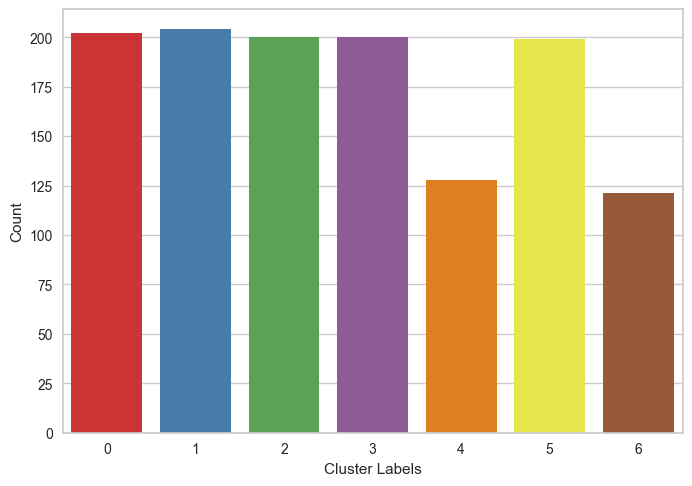

LDA


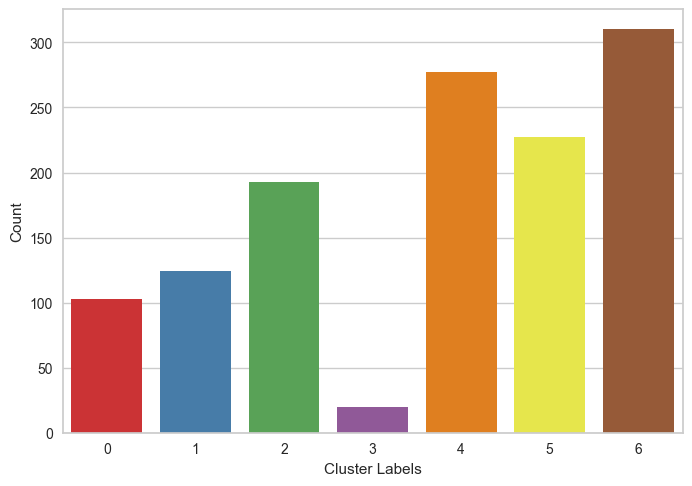

In [46]:
for k in text_embedding.keys():

    X = text_embedding[k]
    print(k)

    # Train a Kmeans instance
    kmeans_classifier = KMeans(n_clusters=7,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=500,
                                   random_state=42,
                                   algorithm='elkan')
    labels = kmeans_classifier.fit_predict(X)

    # Plot the counts of each unique cluster label
    sns.countplot(x =labels, palette = "Set1")
    plt.xlabel('Cluster Labels')
    plt.ylabel('Count')
    plt.show()

#### Distortion Score

#### Distortion is the average of the euclidean squared distance from the centroid of the respective clusters.

BOW


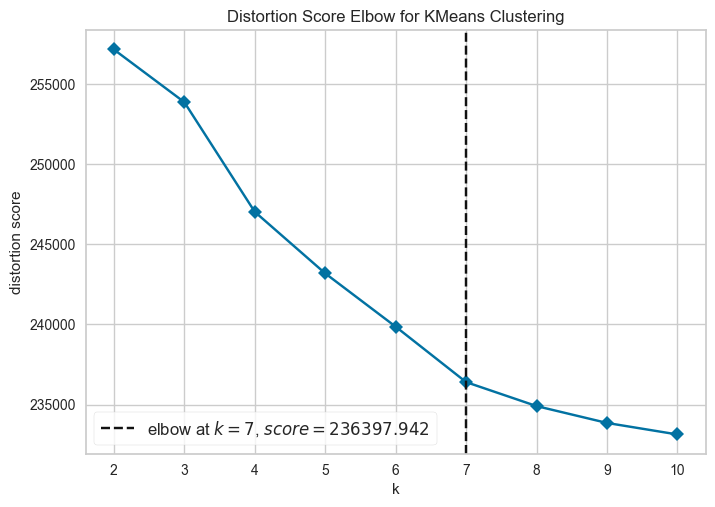

TF_IDF 1_gram


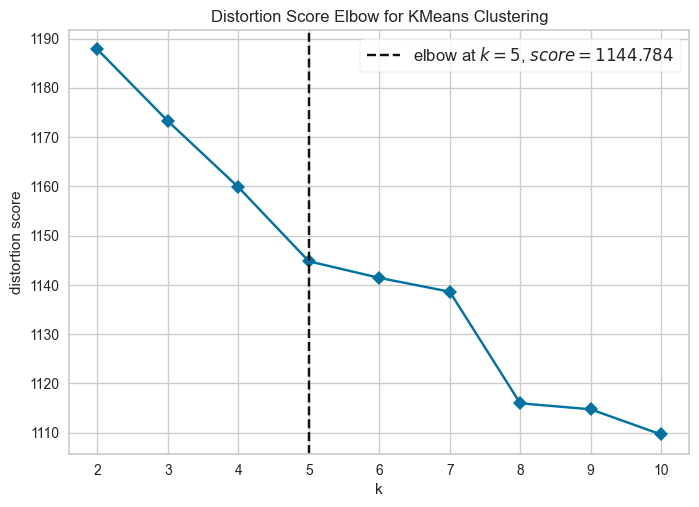

Doc2vec


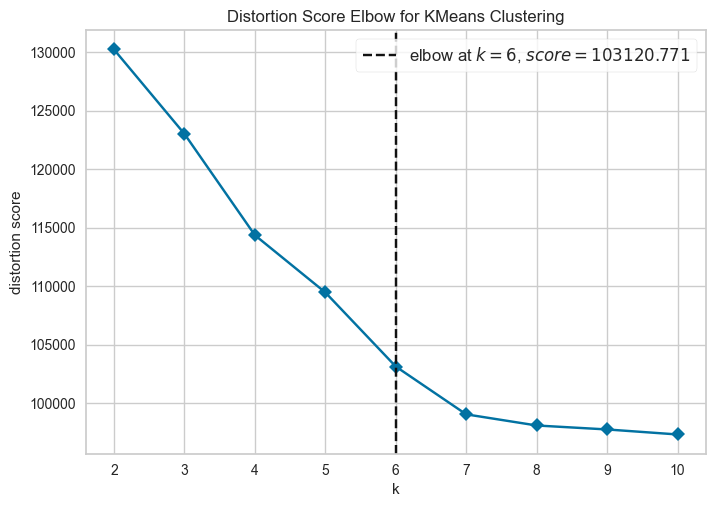

LDA


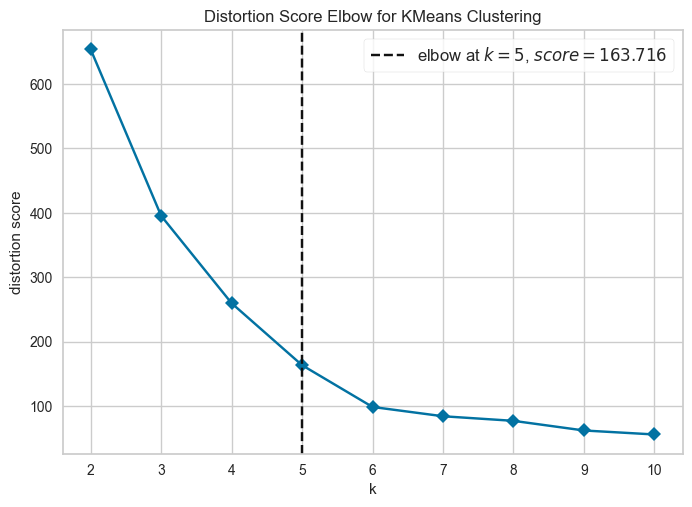

In [62]:
from yellowbrick.cluster.elbow import kelbow_visualizer


for k in text_embedding.keys():
  print(k)
  x_kmeans = text_embedding[k]
  model = kelbow_visualizer(KMeans(random_state=0), x_kmeans, k=(2,11),metric='distortion',timings=False)

#### Champion Model using Distortion Score: BOW

#### Kappa Score:

#### Cohen's kappa coefficient (κ, lowercase Greek kappa) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items.

In [63]:

def label_mapping(num, y_actual, y_target, df_labels):
    if num == df_labels[df_labels[y_actual]==0][y_target].value_counts().idxmax():
        return 0
    if num == df_labels[df_labels[y_actual]==1][y_target].value_counts().idxmax():
        return 1
    if num == df_labels[df_labels[y_actual]==2][y_target].value_counts().idxmax():
        return 2
    if num == df_labels[df_labels[y_actual]==3][y_target].value_counts().idxmax():
        return 3
    if num ==df_labels[df_labels[y_actual]==4][y_target].value_counts().idxmax():
        return 4
    if num ==df_labels[df_labels[y_actual]==5][y_target].value_counts().idxmax():
        return 5
    if num ==df_labels[df_labels[y_actual]==6][y_target].value_counts().idxmax():
        return 6
    else :
      return num

In [64]:
vecs = list(text_embedding.keys())
vec_kappa = dict()
for vec in vecs:
  kmeans_doc2vec = KMeans(n_clusters = 7
                               , init = 'k-means++'
                               , n_init = 10
                               , max_iter=300
                               , random_state = 42
                               , algorithm = 'elkan')
  kmeans_doc2vec.fit(text_embedding[vec])
  y_pridect = kmeans_doc2vec.predict(text_embedding[vec]) 
  y_df = pd.DataFrame({'y_actual':y_actual, 'y_pred':y_pridect})
  y_df['y_pred'] = y_df['y_pred'].apply(lambda val: label_mapping(num=val, y_actual ='y_actual', y_target='y_pred', df_labels=y_df))
  kappa_score = cohen_kappa_score(y_df['y_actual'], y_df['y_pred'])
  vec_kappa[vec] = kappa_score
vec_kappa

{'BOW': 0.9269484011280531,
 'TF_IDF 1_gram': 0.969113761550059,
 'Doc2vec': 0.9915769393526199,
 'LDA': 0.5712475803445829}

In [65]:
fig = go.Figure()
obj = go.Bar(x = list(vec_kappa.keys()), y = list(vec_kappa.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

#### Champion Model using Kappa Score: Doc2vec

#### Coherence - Cosinie Similarity

#### This indicates how closely related the documents are to each other. A higher coherence score (closer to 1.0) indicates that the cluster is a very highly related group of documents. A low coherence score (closer to 0.0) indicates that the documents are more loosely related to each other.

In [186]:
from sklearn.metrics.pairwise import cosine_similarity
vec_coherence = dict()

# Define a function to calculate coherence
def calculate_coherence_doc2vec(doc_embeddings, kmeans_model):
    labels = kmeans_model.fit_predict(doc_embeddings)
    cluster_centers = kmeans_model.cluster_centers_
    coherence_scores = []

    for i, cluster_center in enumerate(cluster_centers):
        cluster_indices = (kmeans_model.labels_ == i)
        cluster_data = doc_embeddings[cluster_indices]
        coherence = cosine_similarity(cluster_data, [cluster_center]).mean()
        coherence_scores.append(coherence)

    average_coherence = sum(coherence_scores) / len(coherence_scores)
    return average_coherence


for k in text_embedding.keys():
    doc_embeddings = text_embedding[k]
    kmeans_model = KMeans(n_clusters=7, random_state=42)
    print(k)

    coherence_doc2vec = calculate_coherence_doc2vec(doc_embeddings, kmeans_model)
    vec_coherence[k] = coherence_doc2vec


    print("Coherence:", coherence_doc2vec)

BOW
Coherence: 0.47154433011222785
TF_IDF 1_gram
Coherence: 0.347013819613073
Doc2vec
Coherence: 0.7019932610648019
LDA
Coherence: 0.9518231610344164


In [187]:
fig = go.Figure()
obj = go.Bar(x = list(vec_coherence.keys()), y = list(vec_coherence.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Coherence for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

#### Champion Model using Coherence Score: LDA

#### Plotting Champion model Clusters

#### **LDA** - Best Silhoutte Score and Coherence Score

LDA


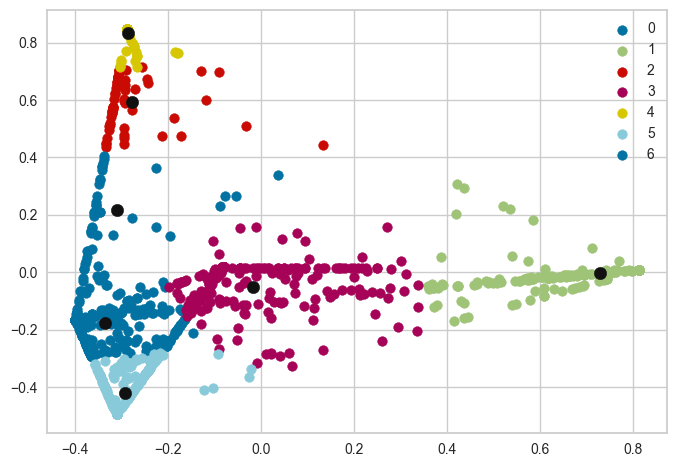

In [55]:
x_data = text_embedding['LDA']
pca = PCA(2)
x_kmeans = pca.fit_transform(x_data)
print('LDA')

    
# Apply KMeans with optimal number of clusters
kmeans_classifier = KMeans(n_clusters=7, random_state=42)
labels = kmeans_classifier.fit_predict(x_kmeans)
centroids = kmeans_classifier.cluster_centers_



u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x_kmeans[labels == i , 0] , x_kmeans[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()
    
  

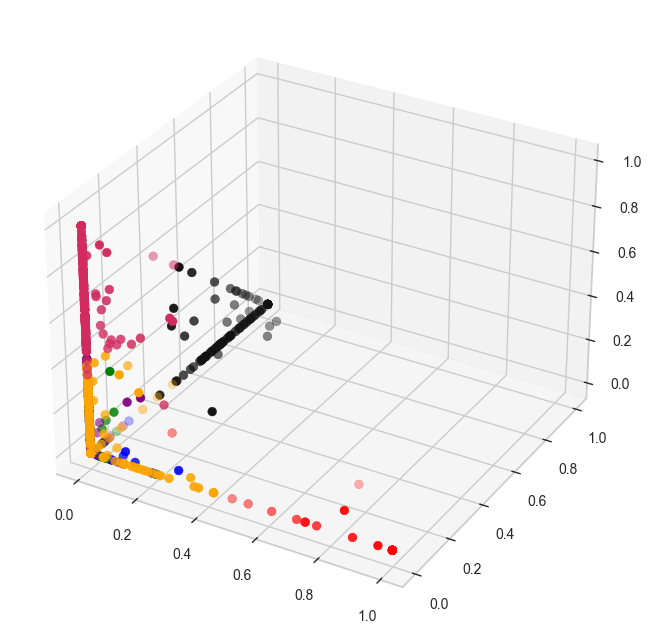

In [60]:
# 3d scatterplot using matplotlib

x = text_embedding['LDA']
kmeans_classifier = KMeans(n_clusters=7)
                                   
labels = kmeans_classifier.fit_predict(x)
y_clusters = kmeans_classifier.fit_predict(x)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = '#111111', label = "cluster 5")
ax.scatter(x[y_clusters == 6,0],x[y_clusters == 6,1],x[y_clusters == 6,2], s = 40 , color = 'red', label = "cluster 6")

#### **BOW** - Best Distortion Score

LDA


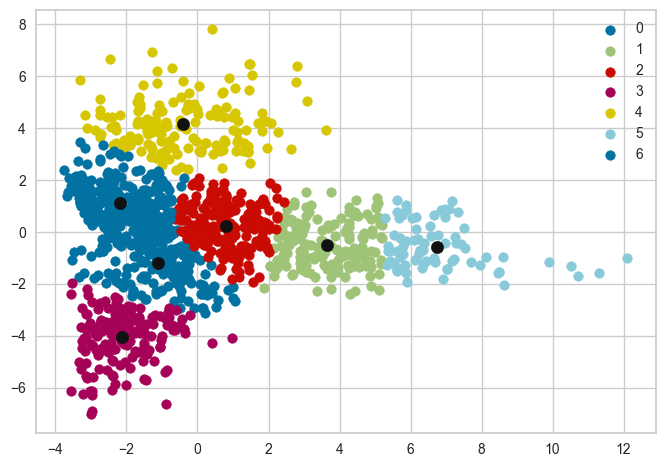

In [69]:
x_data = text_embedding['BOW']
pca = PCA(2)
x_kmeans = pca.fit_transform(x_data)
print('LDA')

    
# Apply KMeans with optimal number of clusters
kmeans_classifier = KMeans(n_clusters=7, random_state=42)
labels = kmeans_classifier.fit_predict(x_kmeans)
centroids = kmeans_classifier.cluster_centers_



u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x_kmeans[labels == i , 0] , x_kmeans[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

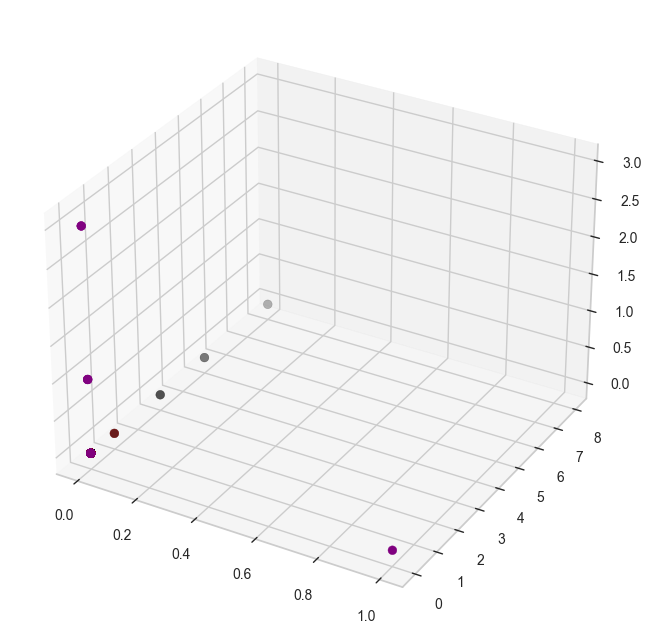

In [70]:
# 3d scatterplot using matplotlib

x = text_embedding['BOW']
kmeans_classifier = KMeans(n_clusters=7)
                                   
labels = kmeans_classifier.fit_predict(x)
y_clusters = kmeans_classifier.fit_predict(x)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = '#111111', label = "cluster 5")
ax.scatter(x[y_clusters == 6,0],x[y_clusters == 6,1],x[y_clusters == 6,2], s = 40 , color = 'red', label = "cluster 6")

#### **Doc2vec** - Best Kappa Score

LDA


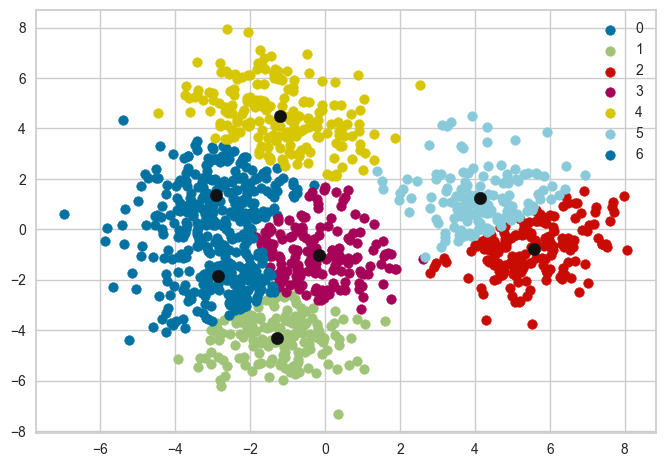

In [72]:
x_data = text_embedding['Doc2vec']
pca = PCA(2)
x_kmeans = pca.fit_transform(x_data)
print('LDA')

    
# Apply KMeans with optimal number of clusters
kmeans_classifier = KMeans(n_clusters=7, random_state=42)
labels = kmeans_classifier.fit_predict(x_kmeans)
centroids = kmeans_classifier.cluster_centers_



u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x_kmeans[labels == i , 0] , x_kmeans[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

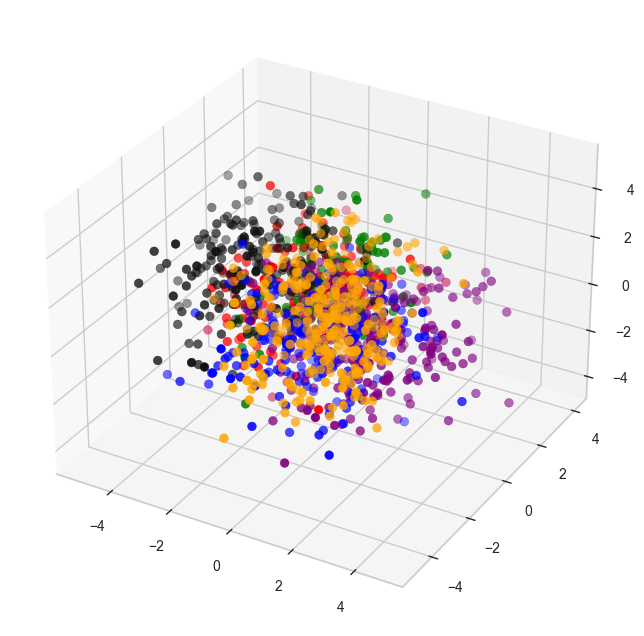

In [71]:
# 3d scatterplot using matplotlib

x = text_embedding['Doc2vec']
kmeans_classifier = KMeans(n_clusters=7)
                                   
labels = kmeans_classifier.fit_predict(x)
y_clusters = kmeans_classifier.fit_predict(x)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = '#111111', label = "cluster 5")
ax.scatter(x[y_clusters == 6,0],x[y_clusters == 6,1],x[y_clusters == 6,2], s = 40 , color = 'red', label = "cluster 6")

#### 2. Expectation Maximization (EM)

In [73]:
import seaborn as sns
sns.set()

In [74]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1000,)
text_embedding_pca=text_embedding.copy()
text_embedding_pca['BOW']=pca.fit_transform(text_embedding['BOW'])
text_embedding_pca['TF_IDF 1_gram']=pca.fit_transform(text_embedding['TF_IDF 1_gram'])

In [76]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,cohen_kappa_score

n_clusters = np.arange(2,10)

silhouette_for_each_transformation=text_embedding_pca.copy()
for key in silhouette_for_each_transformation.keys():
    silhouette_for_each_transformation[key]=[]

bic_for_each_transformation=text_embedding_pca.copy()
for key in bic_for_each_transformation.keys():
    bic_for_each_transformation[key]=[]


labels_for_each_transformation=text_embedding_pca.copy()
for key in labels_for_each_transformation.keys():
    labels_for_each_transformation[key]=[]

kappa_for_each_transformation=text_embedding_pca.copy()

y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})
for key in text_embedding_pca.keys():
    silhouette_scores=[]
    bic=[]
    aic=[]
    kappa_at_5=[]
    labels_list=[]
    for n in n_clusters :
        model=GaussianMixture(n, covariance_type='full', random_state=42)
        labels=model.fit_predict(text_embedding_pca[key])
        silhouette_scores.append(silhouette_score(text_embedding_pca[key],labels=labels))
        if n==7 :
          y_df['y_pred']=labels
          y_df['y_pred']=y_df['y_pred'].apply(lambda row: label_mapping(num=row,y_actual = 'y_actual',y_target='y_pred',df_labels=y_df ))
          y_df['y_pred']=y_df['y_pred'].apply(lambda x: x-1000 if x>20 else x)
          right_labels_mapping=y_df['y_pred']
          kappa_at_5=cohen_kappa_score(y_actual,right_labels_mapping )
        bic.append(model.bic(text_embedding_pca[key]))
        labels_list.append(labels)
    silhouette_for_each_transformation[key].append(silhouette_scores)
    bic_for_each_transformation[key].append(bic)
    kappa_for_each_transformation[key]=kappa_at_5
    labels_for_each_transformation[key].append(labels_list)

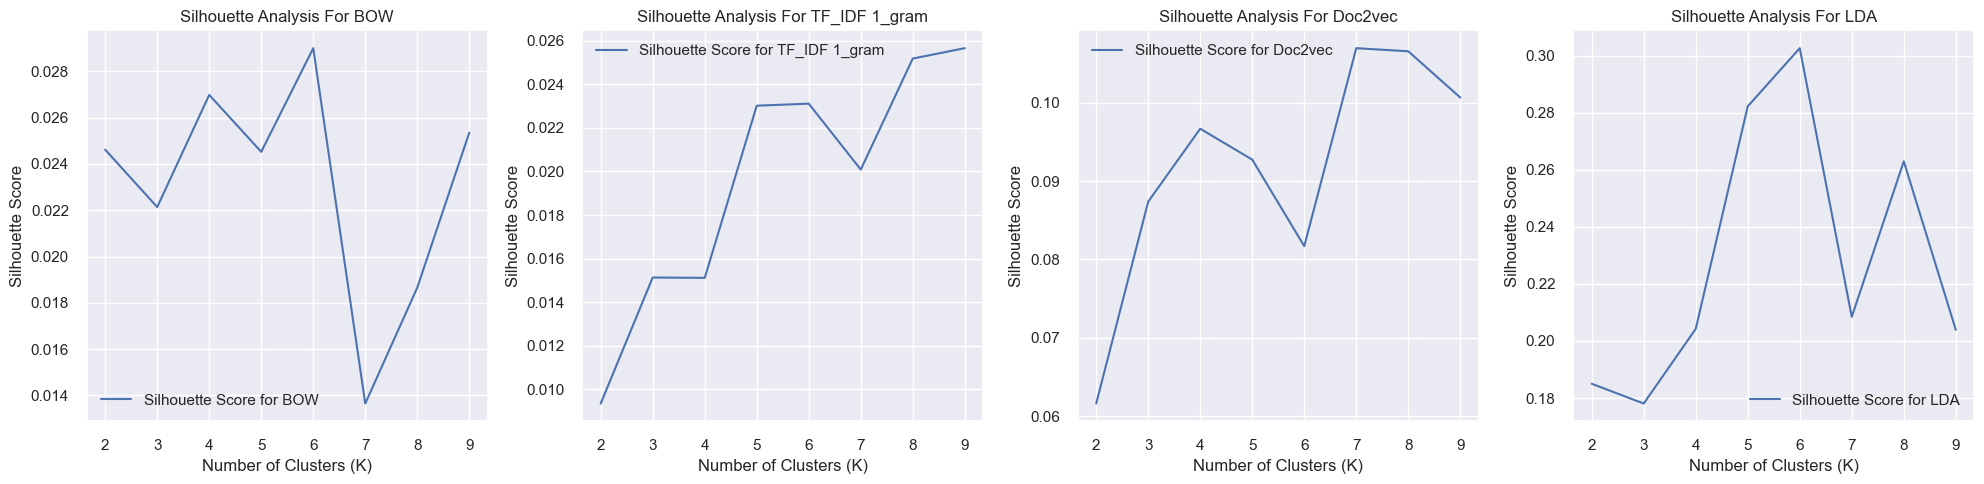

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Initialize dictionaries to store silhouette scores and optimal clusters
em_sil_vec = {}
optimal_clusters_em = {}
clusters = 10

# Create a figure with 1 row and 4 columns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

# Iterate over each data item
for idx, (k, x_em) in enumerate(text_embedding_pca.items()):
    silhouette_scores_em = []
    optimal_silhouette_score_em = -1  # Initialize the optimal silhouette score
    optimal_k_value_em = -1  # Initialize the corresponding K value

    # Calculate silhouette score for different number of clusters
    for i in range(2, clusters):
        em_classifier = GaussianMixture(n_components=i, covariance_type='full', random_state=42)
        label_em = em_classifier.fit_predict(x_em)
        silhouette_score_val = silhouette_score(x_em, label_em)
        
        # Update optimal silhouette score and K value
        if silhouette_score_val > optimal_silhouette_score_em:
            optimal_silhouette_score_em = silhouette_score_val
            optimal_k_value_em = i
        
        silhouette_scores_em.append(silhouette_score_val)
    
    optimal_clusters_em[k] = (optimal_silhouette_score_em, optimal_k_value_em)
    # Store silhouette scores in dictionary
    em_sil_vec[k] = silhouette_scores_em
    
    # Plot silhouette score against the number of clusters on respective axes
    if idx == 0:
        ax1.plot(range(2, clusters), silhouette_scores_em, 'bx-', label='Silhouette Score for {}'.format(k))
        ax1.set_xlabel('Number of Clusters (K)')
        ax1.set_ylabel('Silhouette Score')
        ax1.set_title('Silhouette Analysis For {}'.format(k))
        ax1.legend()
        ax1.grid(True)
    elif idx == 1:
        ax2.plot(range(2, clusters), silhouette_scores_em, 'bx-', label='Silhouette Score for {}'.format(k))
        ax2.set_xlabel('Number of Clusters (K)')
        ax2.set_ylabel('Silhouette Score')
        ax2.set_title('Silhouette Analysis For {}'.format(k))
        ax2.legend()
        ax2.grid(True)
    elif idx == 2:
        ax3.plot(range(2, clusters), silhouette_scores_em, 'bx-', label='Silhouette Score for {}'.format(k))
        ax3.set_xlabel('Number of Clusters (K)')
        ax3.set_ylabel('Silhouette Score')
        ax3.set_title('Silhouette Analysis For {}'.format(k))
        ax3.legend()
        ax3.grid(True)
    elif idx == 3:
        ax4.plot(range(2, clusters), silhouette_scores_em, 'bx-', label='Silhouette Score for {}'.format(k))
        ax4.set_xlabel('Number of Clusters (K)')
        ax4.set_ylabel('Silhouette Score')
        ax4.set_title('Silhouette Analysis For {}'.format(k))
        ax4.legend()
        ax4.grid(True)

plt.tight_layout()
plt.show()


In [84]:
for k in text_embedding.keys():
   print(k)
   value = optimal_clusters_em[k][0]
   k_value = optimal_clusters_em[k][1]
   print( "The best silhouette score was", value, "with k =", k_value)

BOW
The best silhouette score was 0.029002922168045432 with k = 6
TF_IDF 1_gram
The best silhouette score was 0.02565203447045843 with k = 9
Doc2vec
The best silhouette score was 0.10696922 with k = 7
LDA
The best silhouette score was 0.3026048854101104 with k = 6


#### Champion Model using Silhouette Score: Doc2vec

#### Countplot to check number of samples in each cluster

BOW


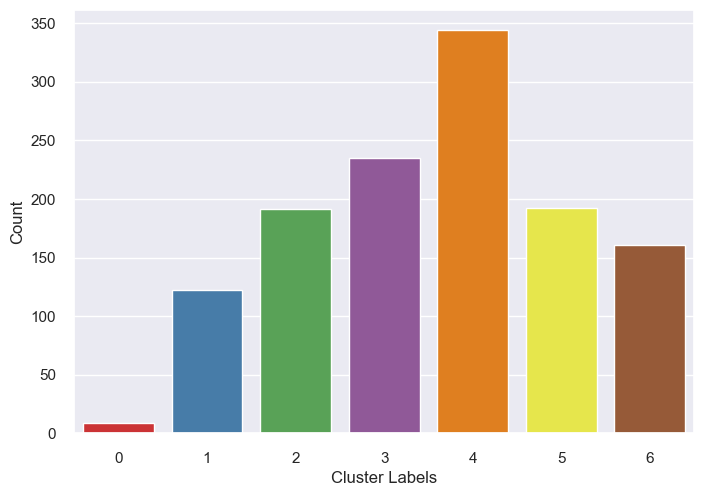

TF_IDF 1_gram


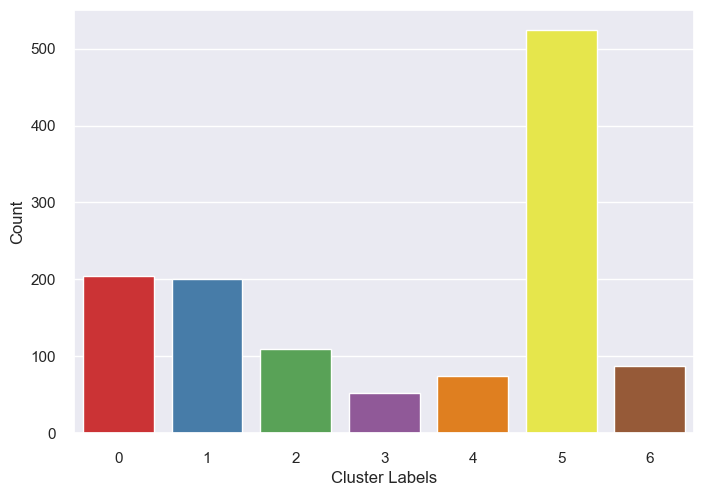

Doc2vec


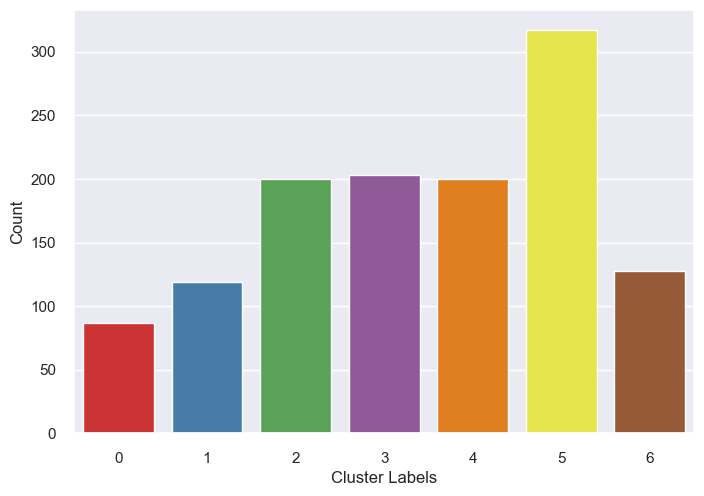

LDA


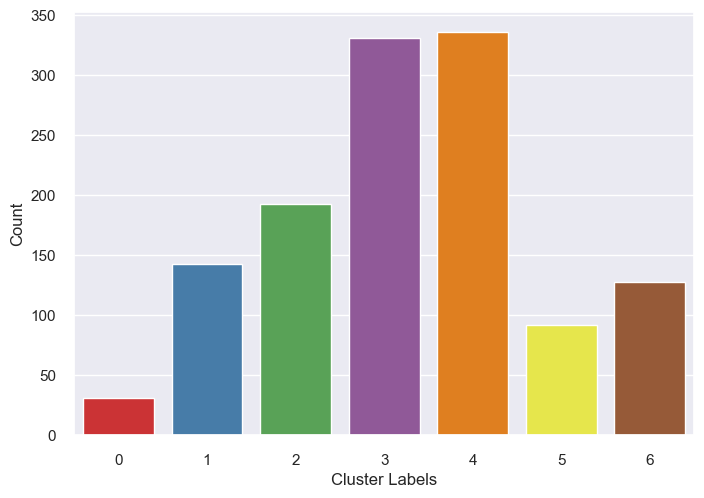

In [78]:
for k in text_embedding_pca.keys():

    X = text_embedding_pca[k]
    print(k)

    # Train a Kmeans instance
    model=GaussianMixture(7, covariance_type='full', random_state=42)
    labels=model.fit_predict(text_embedding_pca[k])

    # Plot the counts of each unique cluster label
    sns.countplot(x =labels, palette = "Set1")
    plt.xlabel('Cluster Labels')
    plt.ylabel('Count')
    plt.show()

In [85]:
kappa_for_each_transformation

{'BOW': 0.8058622208260497,
 'TF_IDF 1_gram': 0.5533324034788556,
 'Doc2vec': 0.7974471473862936,
 'LDA': 0.47541304613878343}

In [86]:
fig = go.Figure()
obj = go.Bar(x = list(kappa_for_each_transformation.keys()), y = list(kappa_for_each_transformation.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers - EM','x':0.5},height=600,width=600)
fig.show()

#### Champion Model using Kappa Score: BOW

#### Coherence - Cosinie Similarity

In [188]:
from sklearn.metrics.pairwise import cosine_similarity
vec_coherence_em = dict()

# Define a function to calculate coherence
def calculate_coherence(doc_embeddings, em_model):
    labels = em_model.fit_predict(doc_embeddings)
    cluster_centers = em_model.means_
    coherence_scores = []

    for i, cluster_center in enumerate(cluster_centers):
        cluster_indices = (labels == i)
        cluster_data = doc_embeddings[cluster_indices]
        coherence = cosine_similarity(cluster_data, [cluster_center]).mean()
        coherence_scores.append(coherence)

    average_coherence = sum(coherence_scores) / len(coherence_scores)
    return average_coherence


for k in text_embedding_pca.keys():
    doc_embeddings = text_embedding_pca[k]
    em_model = GaussianMixture(n_components=7,random_state=42)
    print(k)

    coherence_em = calculate_coherence(doc_embeddings, em_model)
    vec_coherence_em[k] = coherence_em


    print("Coherence:", coherence_em)

BOW
Coherence: 0.3485646984281131
TF_IDF 1_gram
Coherence: 0.2611280302627969
Doc2vec
Coherence: 0.7020529459973476
LDA
Coherence: 0.790614264609358


In [189]:
fig = go.Figure()
obj = go.Bar(x = list(vec_coherence_em.keys()), y = list(vec_coherence_em.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Coherence for Different Vectorizers - EM','x':0.5},height=600,width=600)
fig.show()

#### Champion Model using Coherence Score: LDA

#### Plotting Champion model Clusters

#### **BOW** - Best Kappa Score

In [87]:
from sklearn.decomposition import PCA
print("BOW")
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='BOW'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][6]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

BOW


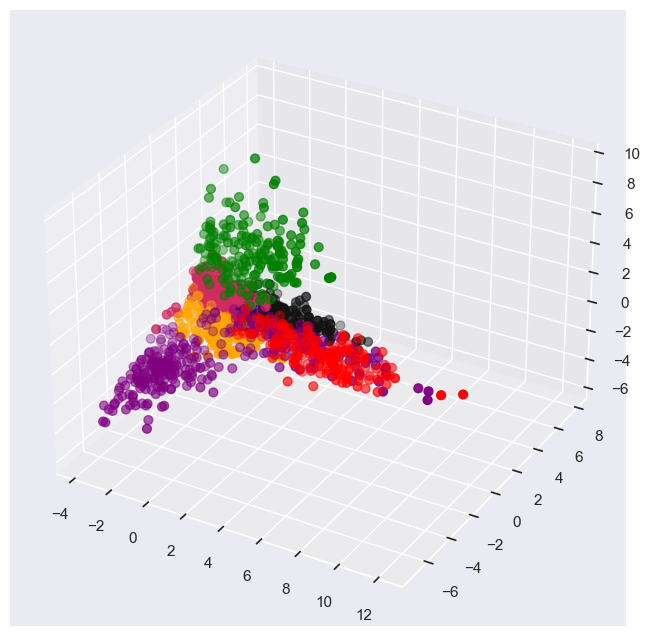

In [88]:
# 3d scatterplot using matplotlib

x = text_embedding_pca['BOW']
model=GaussianMixture(7, covariance_type='full', random_state=42)
labels=model.fit_predict(text_embedding_pca['BOW'])
                                   
y_clusters = model.fit_predict(text_embedding_pca['BOW'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = '#111111', label = "cluster 5")
ax.scatter(x[y_clusters == 6,0],x[y_clusters == 6,1],x[y_clusters == 6,2], s = 40 , color = 'red', label = "cluster 6")

#### **Doc2Vec** - Best Silhoutte Score

In [89]:
from sklearn.decomposition import PCA
print("Doc2vec")
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='Doc2vec'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][6]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

Doc2vec


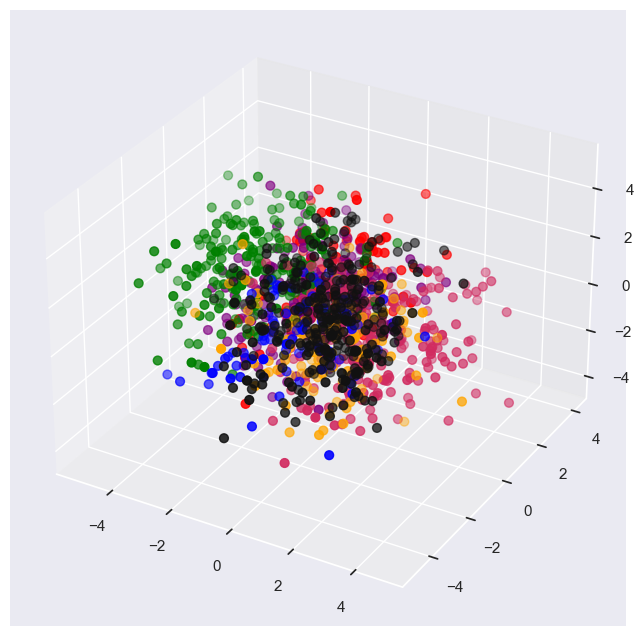

In [90]:
# 3d scatterplot using matplotlib

x = text_embedding_pca['Doc2vec']
model=GaussianMixture(7, covariance_type='full', random_state=42)
labels=model.fit_predict(text_embedding_pca['Doc2vec'])
                                   
y_clusters = model.fit_predict(text_embedding_pca['Doc2vec'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = '#111111', label = "cluster 5")
ax.scatter(x[y_clusters == 6,0],x[y_clusters == 6,1],x[y_clusters == 6,2], s = 40 , color = 'red', label = "cluster 6")

#### **LDA** - Best Coherence Score

In [190]:
from sklearn.decomposition import PCA
print("LDA")
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='LDA'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][6]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

LDA


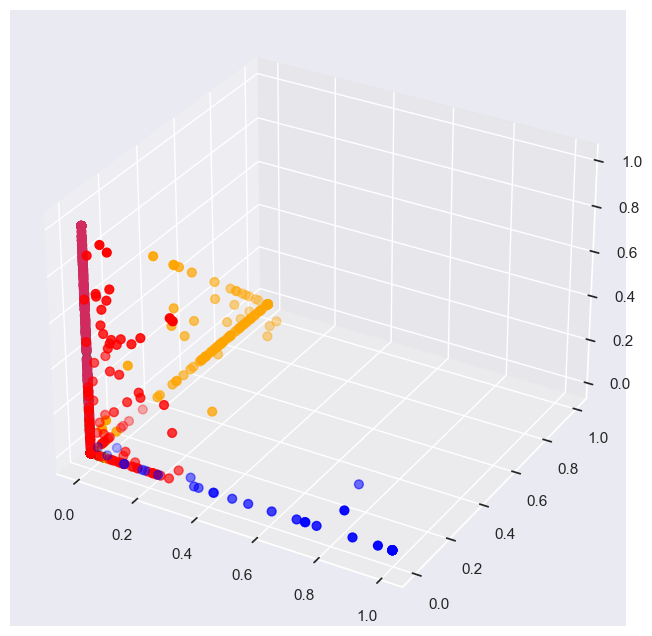

In [191]:
# 3d scatterplot using matplotlib

x = text_embedding_pca['LDA']
model=GaussianMixture(7, covariance_type='full', random_state=42)
labels=model.fit_predict(text_embedding_pca['LDA'])
                                   
y_clusters = model.fit_predict(text_embedding_pca['LDA'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.scatter(x[y_clusters == 5,0],x[y_clusters == 5,1],x[y_clusters == 5,2], s = 40 , color = '#111111', label = "cluster 5")
ax.scatter(x[y_clusters == 6,0],x[y_clusters == 6,1],x[y_clusters == 6,2], s = 40 , color = 'red', label = "cluster 6")

#### 3. Hierarchical

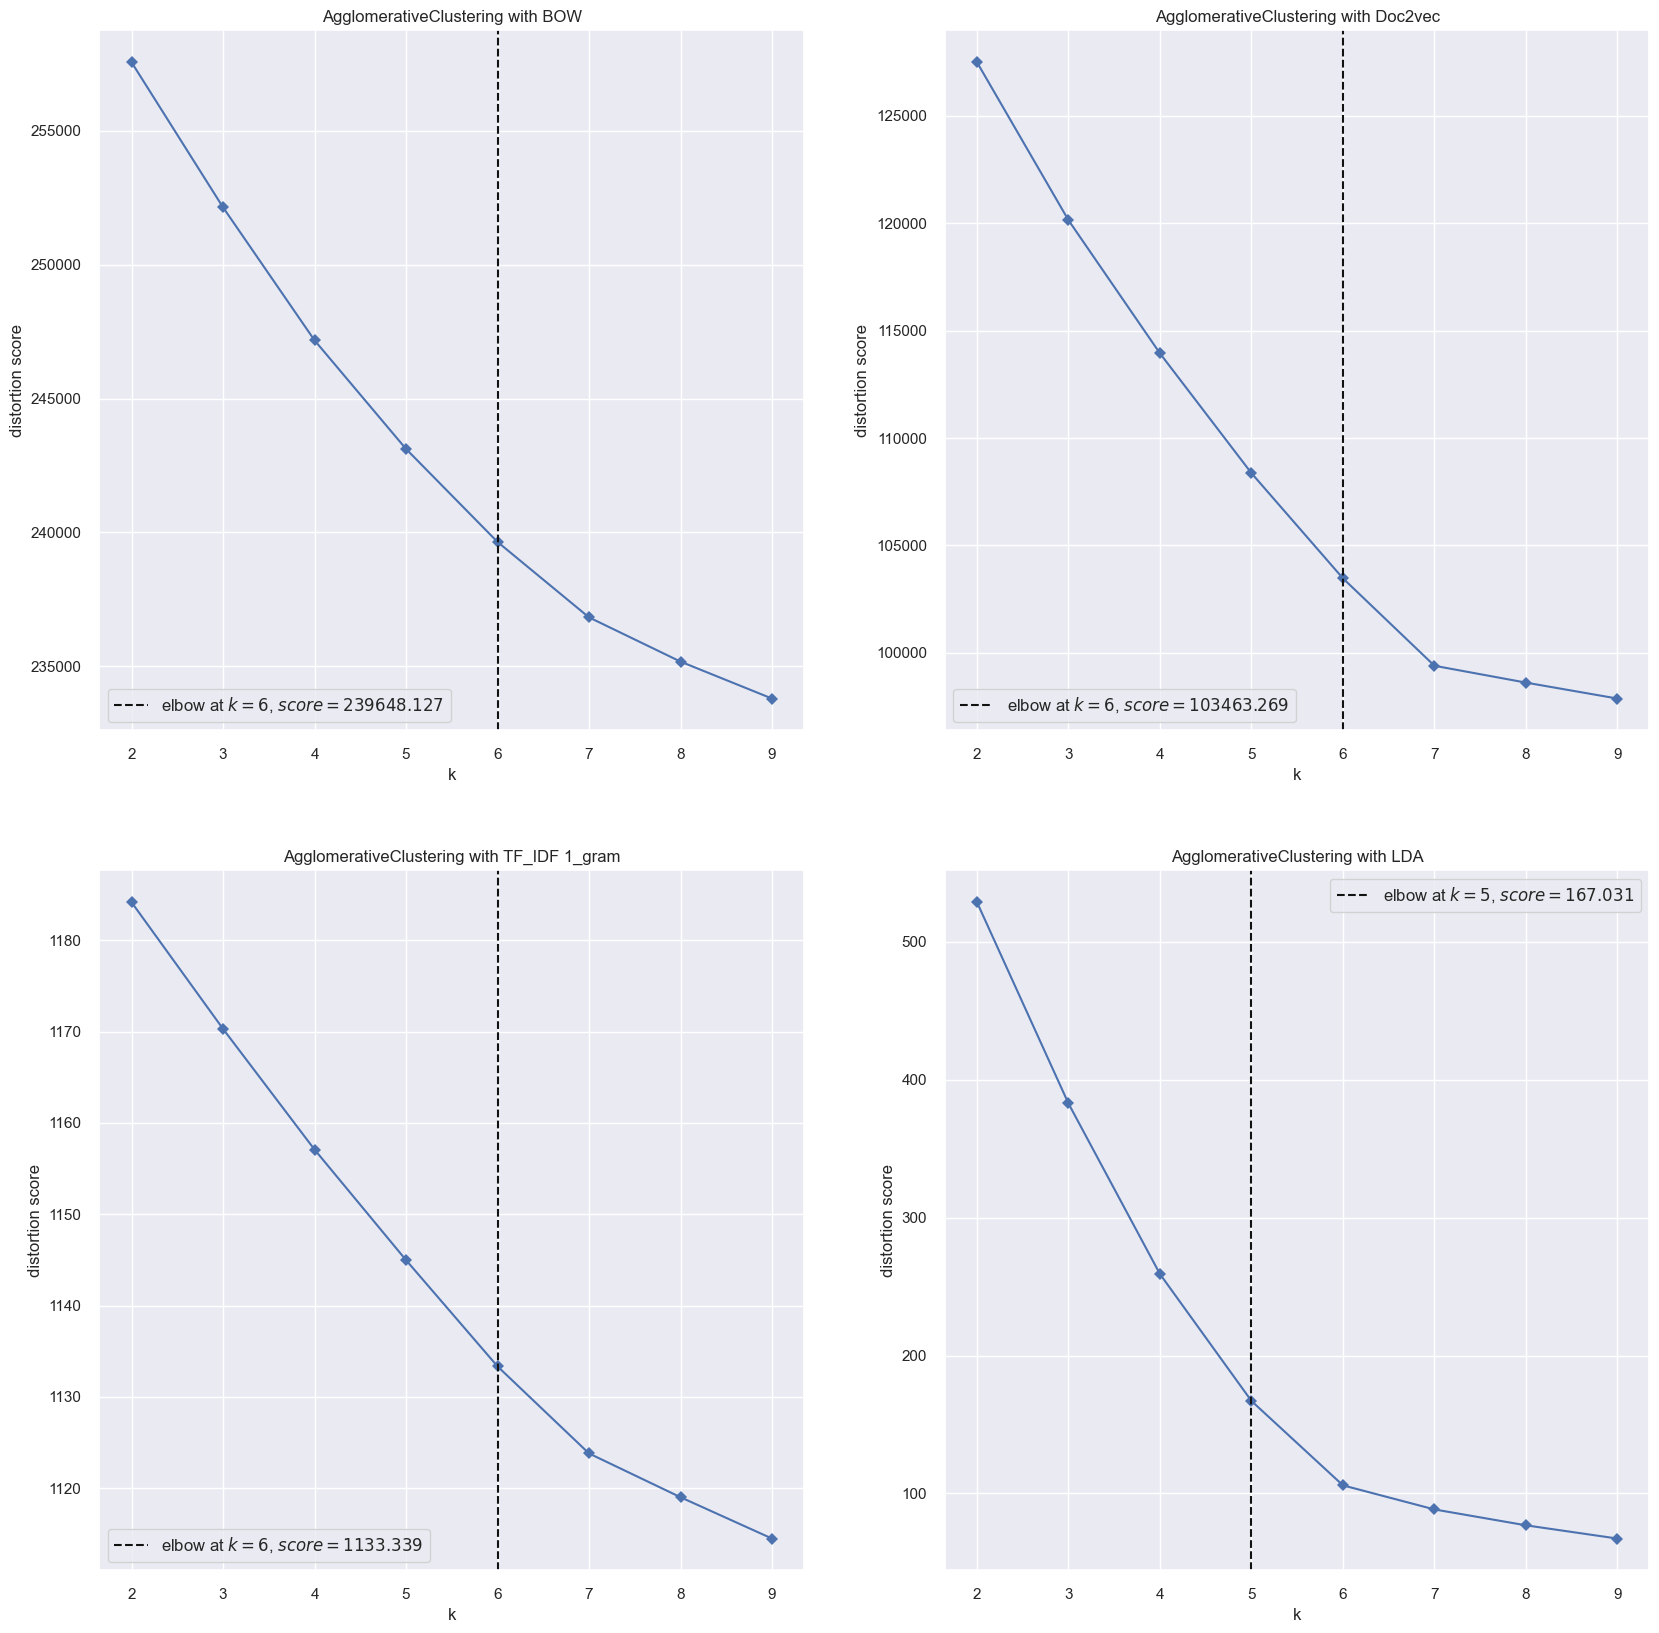

In [225]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

x_size , y_size =2,2
fig, axes = plt.subplots(2, 2,figsize=(20,20))

model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(2,10), metric='distortion', 
                                                        timings=False, 
                                                        ax=axes[i%x_size][i//y_size], 
                                                        title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

#### Champion Model using Distortion Score: TF_IDF 1_gram

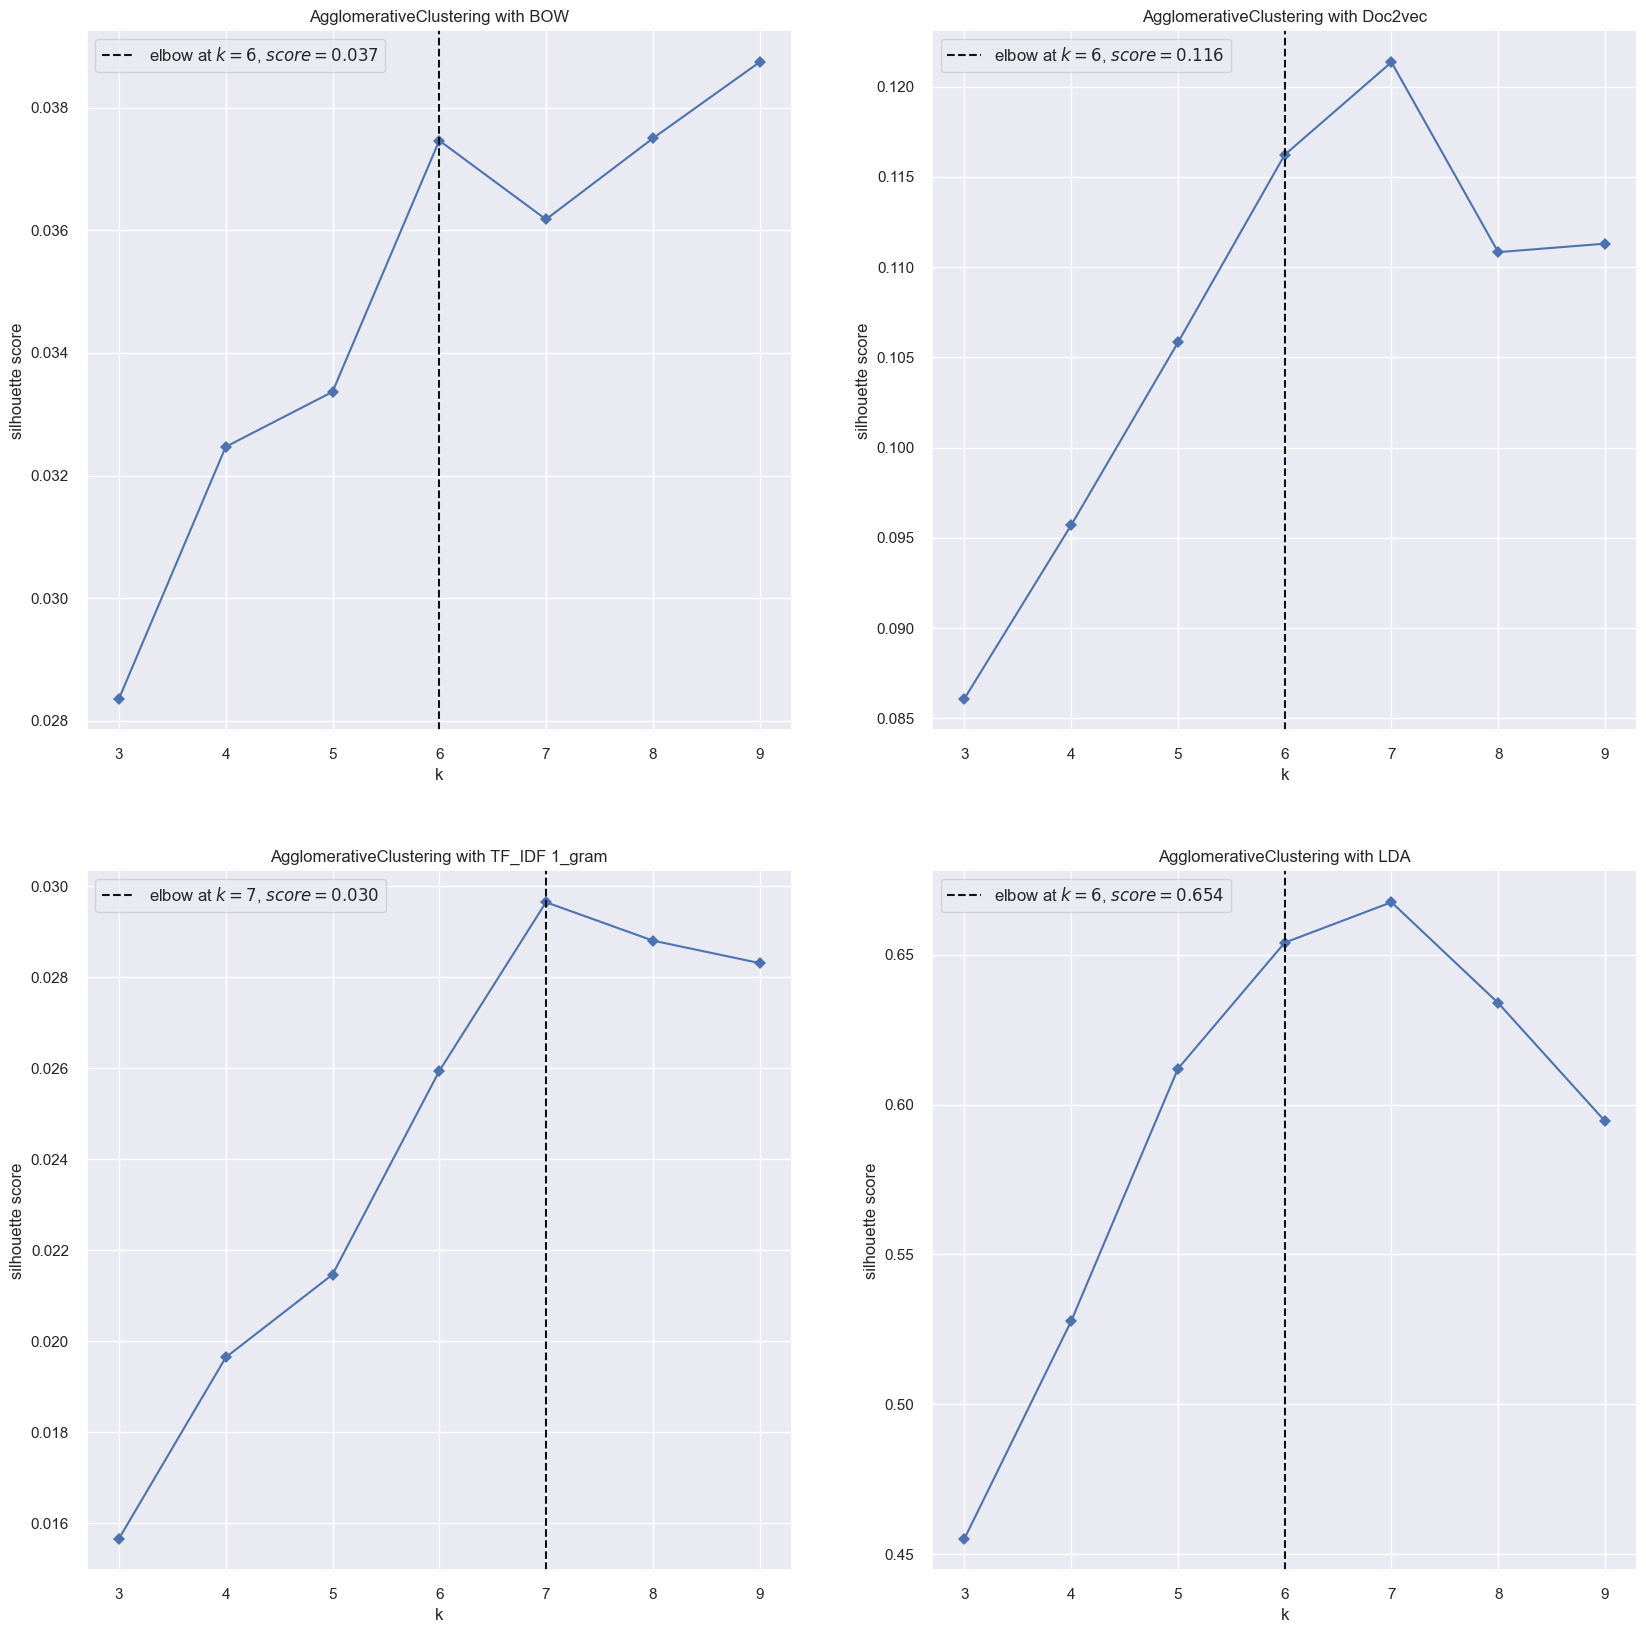

In [95]:
import matplotlib.pyplot as plt

x_size , y_size =2,2
fig, axes = plt.subplots(2, 2,figsize=(20,20))
model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(3,10), metric='silhouette', timings=False, ax=axes[i%x_size][i//y_size], title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

#### Champion Model using Silhouette Score: TF IDF

#### Countplot to check number of samples in each cluster

BOW


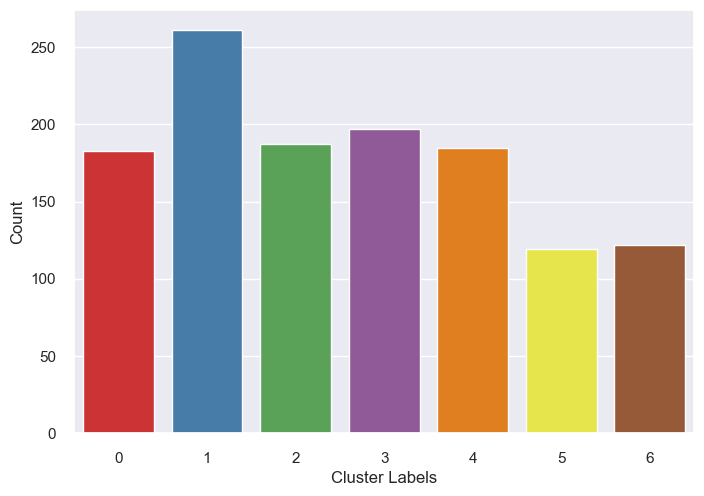

TF_IDF 1_gram


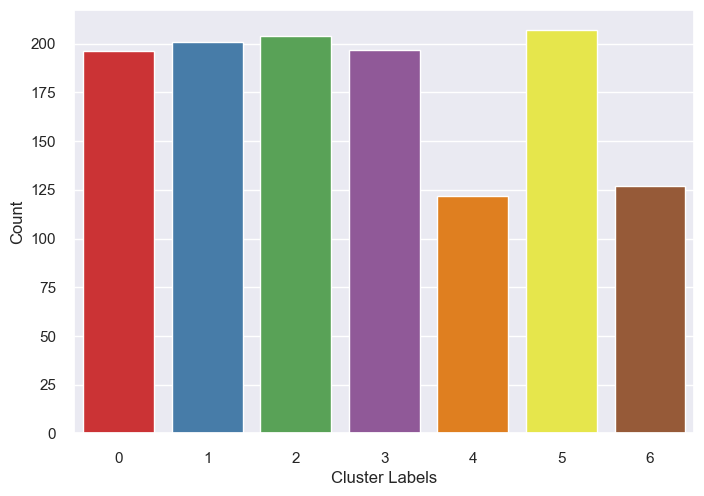

Doc2vec


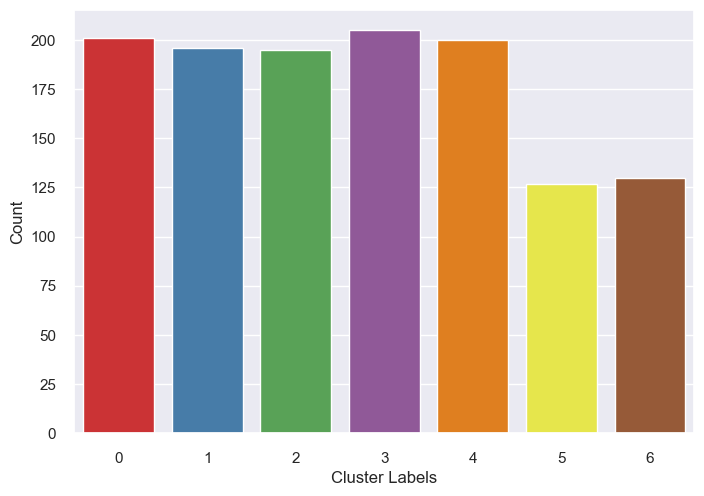

LDA


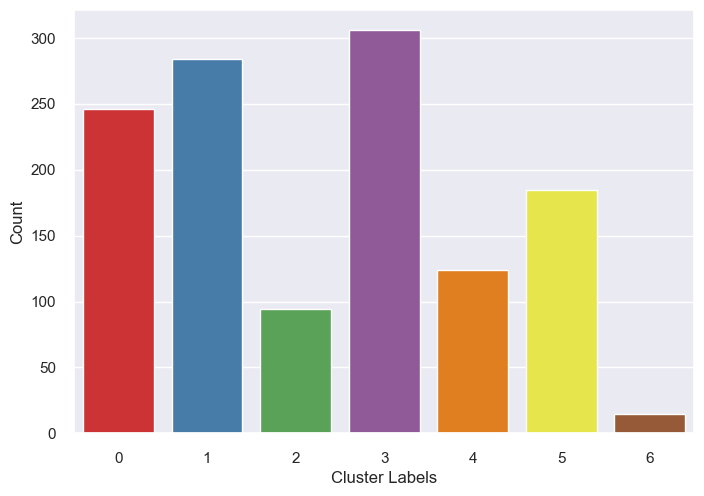

In [99]:
for k in text_embedding_pca.keys():

    X = text_embedding_pca[k]
    print(k)

    # Train a Kmeans instance
    hie_classifier = AgglomerativeClustering(n_clusters = 7)
    labels = hie_classifier.fit(X)
    y_clusters = labels.labels_

    # Plot the counts of each unique cluster label
    sns.countplot(x =y_clusters, palette = "Set1")
    plt.xlabel('Cluster Labels')
    plt.ylabel('Count')
    plt.show()

In [100]:
from sklearn.cluster import AgglomerativeClustering
y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})
models = [AgglomerativeClustering(n_clusters=7)]

models_scores = {}
for model in models:
  print(type(model).__name__)
  kappa_scores = {}
  for key in text_embedding.keys():
    clustering = model.fit(text_embedding[key])
    df_labels = pd.DataFrame({'y_actual':y_df['y_actual'], 'y_pred':clustering.labels_})
    df_labels['y_pred'] = df_labels['y_pred'].apply(lambda val: label_mapping(num=val,y_actual = 'y_actual',y_target='y_pred',df_labels=df_labels ))
    df_labels['y_pred']=df_labels['y_pred'].apply(lambda x: x-1000 if x>20 else x)
    kappa_score = cohen_kappa_score(df_labels['y_actual'], df_labels['y_pred'])
    kappa_scores[key] = kappa_score
    print(key, ':', kappa_score)
  models_scores[type(model).__name__] = kappa_scores

AgglomerativeClustering
BOW : 0.9419681477174422
TF_IDF 1_gram : 0.9709872355479131
Doc2vec : 0.9850321937638616
LDA : 0.5810154648038124


In [101]:
for model_scores,model in zip(models_scores.keys(),models):
    fig = go.Figure()
    obj = go.Bar(x = list(models_scores[model_scores].keys()), y = list(models_scores[model_scores].values()))
    fig.add_trace(obj)
    fig.update_layout(title={'text':f'Kappa Score of the {type(model).__name__}','x':0.5},height=600,width=800)
    fig.show()

#### Champion Model using Kappa Score: Doc2vec

#### Coherence - Cosinie Similarity

In [192]:
from sklearn.metrics.pairwise import cosine_similarity
vec_coherence_hie = dict()

# Define a function to calculate coherence
def calculate_coherence(doc_embeddings, hie_model):
    labels = hie_model.fit_predict(doc_embeddings)
    unique_labels = np.unique(labels)
    coherence_scores = []

    for label in unique_labels:
        cluster_indices = (labels == label)
        cluster_data = doc_embeddings[cluster_indices]
        cluster_center = np.mean(cluster_data, axis=0)  # Compute centroid of the cluster
        cluster_center = cluster_center.reshape(1, -1)  # Reshape to ensure 2D array
        cluster_data_2d = np.squeeze(cluster_data)  # Squeeze to remove single-dimensional entries
        coherence = cosine_similarity(cluster_data_2d, cluster_center).mean()
        coherence_scores.append(coherence)
        
    average_coherence = sum(coherence_scores) / len(coherence_scores)
    return average_coherence


for k in text_embedding.keys():
    doc_embeddings = text_embedding[k]
    hie_model = AgglomerativeClustering(n_clusters = 7)
    print(k)

    coherence_hie = calculate_coherence(doc_embeddings, hie_model)
    vec_coherence_hie[k] = coherence_hie


    print("Coherence:", coherence_hie)

BOW
Coherence: 0.4483562111501075
TF_IDF 1_gram
Coherence: 0.3244578249366507
Doc2vec
Coherence: 0.7078238129615784
LDA
Coherence: 0.9563718598847115


In [193]:
fig = go.Figure()
obj = go.Bar(x = list(vec_coherence_hie.keys()), y = list(vec_coherence_hie.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Coherence for Different Vectorizers - HC','x':0.5},height=600,width=600)
fig.show()

#### Champion Model using Coherence Score: LDA

#### Plotting Champion model Clusters

#### **Doc2Vec** - Best Kappa Score

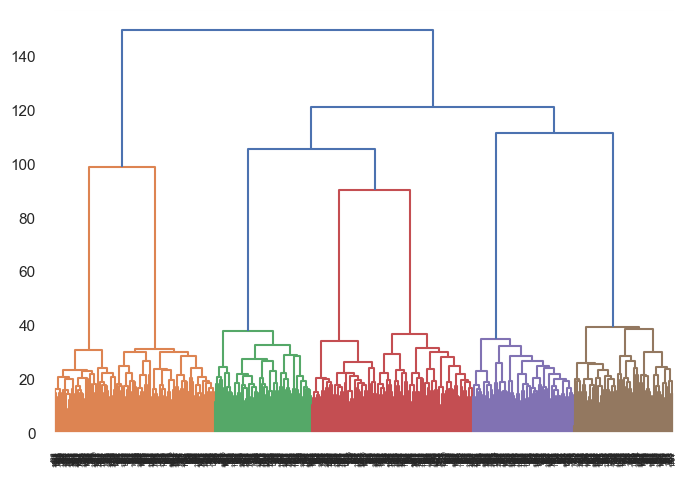

In [102]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(text_embedding['Doc2vec'], method='ward'))
hc = AgglomerativeClustering(n_clusters = 7, linkage = "average", metric = "cosine" )
y_hc = hc.fit_predict(text_embedding['Doc2vec'])

#### **TF_IDF 1_gram** - Best Distortion Score and Silhouette Score

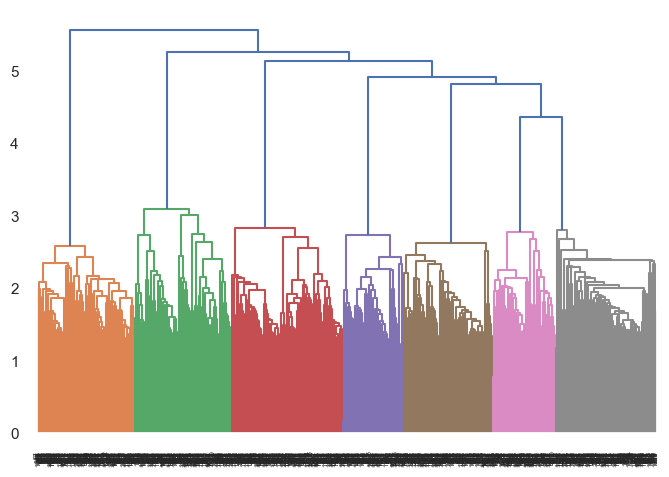

In [103]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(text_embedding['TF_IDF 1_gram'], method='ward'))
hc = AgglomerativeClustering(n_clusters = 7, linkage = "average", metric = "cosine" )
y_hc = hc.fit_predict(text_embedding['TF_IDF 1_gram'])

#### **LDA** - Best Coherence Score

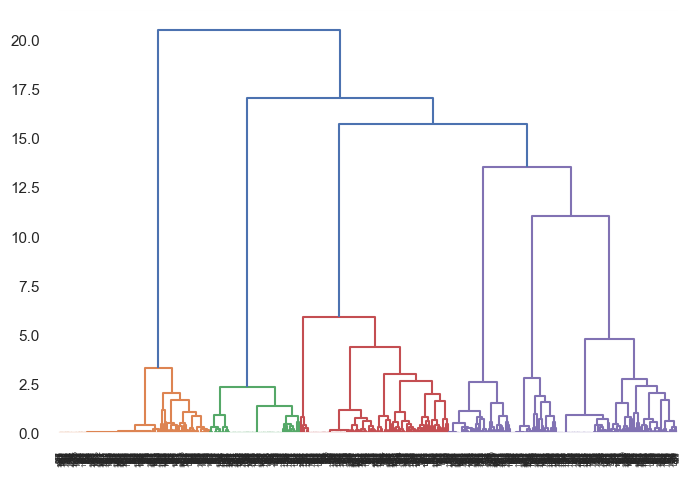

In [194]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(text_embedding['LDA'], method='ward'))
hc = AgglomerativeClustering(n_clusters = 7, linkage = "average", metric = "cosine" )
y_hc = hc.fit_predict(text_embedding['LDA'])

### Step 4: Finding the Champion Model

#### We have the following champion models:
- For Kmeans: 
1. LDA - Best Silhouette Score
2. BOW - Best Distortion Score
3. Doc2Vec - Best Kappa Score
4. LDA - Best Coherence Score

- For EM: 
1. Doc2vec - Best Silhouette Score
2. BOW - Best Kappa Score
3. LDA - Best Coherence Score

- For Hiearchical Clustering: 
1. TF_IDF 1_gram - Best Silhouette Score
2. TF_IDF 1-gram - Best Distortion Score
3. Doc2Vec - Best Kappa Score
4. LDA - Best Coherence Score


In [196]:
champion_models_sil = {'LDA with Kmeans': 0.6782469363737805,
                        'Doc2vec with EM:': 0.10696922, 
                        'Doc2vec with hierarchical': 0.030}
champion_models_dis = {'BOW with Kmeans': 236397.942,
                        'Doc2vec with EM:': 1133.339, 
                        'TF_IDF 1_gram with hierarchical': 0.9953215414289818}
champion_models_kappa = {'Doc2Vec with Kmeans': 0.9915769393526199,
                        'BOW with EM:': 0.8058622208260497, 
                        'Doc2vec with hierarchical': 0.9850321937638616}
champion_models_coherence = {'LDA with Kmeans': 0.9518231610344164,
                        'LDA with EM:': 0.790614264609358, 
                        'LDA with hierarchical': 0.9563718598847115}

fig = go.Figure()
obj = go.Bar(x = list(champion_models_sil.keys()), y = list(champion_models_sil.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Champion model for Silhouette Score','x':0.5},height=600,width=600)
fig.show()
                    

In [197]:
fig = go.Figure()
obj = go.Bar(x = list(champion_models_dis.keys()), y = list(champion_models_dis.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Champion model for Distortion Score','x':0.5},height=600,width=600)
fig.show()

In [198]:
fig = go.Figure()
obj = go.Bar(x = list(champion_models_kappa.keys()), y = list(champion_models_kappa.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Champion model for Kappa Score','x':0.5},height=600,width=600)
fig.show()

In [199]:
fig = go.Figure()
obj = go.Bar(x = list(champion_models_coherence.keys()), y = list(champion_models_coherence.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Champion model for Coherence Score','x':0.5},height=600,width=600)
fig.show()

#### Hence our champion models are: 
### 1. **LDA with KMeans** - Best Silhouette Score
### 2. **TF_IDF 1_gram with Hiearchical** - Best Distortion Score
### 3. **Doc2Vec with KMeans** - Best Kappa Score
### 4. **LDA with Hiearchical** - Best Coherence Score

### Step 5: Error Analysis

#### Error analysis is a crucial step in evaluating the performance of clustering algorithms. It helps identify the characteristics of instances or documents that were incorrectly clustered. By understanding why certain documents were misclassified, we can gain insights into the strengths and weaknesses of the clustering approach and potentially improve it.

In [219]:
from collections import Counter

In [220]:
true_labels = pd.read_csv("encoded_books_data.csv", usecols = ['Book_Name'])

In [221]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

def eval_cluster_metrics(embedding, model, model_name):
    y_pred = model.fit_predict(embedding)
    df = true_labels
    target = "Book_Name"
    
    # Evaluate the performance using ARI, NMI, and FMI
    ari = adjusted_rand_score(df[target], y_pred)
    nmi = normalized_mutual_info_score(df[target], y_pred)
    fmi = fowlkes_mallows_score(df[target], y_pred)

    # Print Metrics scores
    print("-----------")
    print(model_name)
    print("Adjusted Rand Index (ARI): {:.3f}".format(ari))
    print("Normalized Mutual Information (NMI): {:.3f}".format(nmi))
    print("Fowlkes-Mallows Index (FMI): {:.3f}".format(fmi))

In [236]:
def error_analysis_correctly_classified(clusters, true_labels):
    num_clusters = len(np.unique(clusters))
    errors = []
    for cluster in range(num_clusters):
        cluster_indices = np.where(clusters == cluster)[0].tolist()  # Convert numpy array to list
        cluster_true_labels = [true_labels.iloc[idx]['Book_Name'] for idx in cluster_indices]  # Get cluster true labels
        if len(cluster_true_labels) > 0:
            most_common_label = Counter(cluster_true_labels).most_common(1)[0][0]
            error_rate = 1 - Counter(cluster_true_labels)[most_common_label] / len(cluster_indices)
            errors.append((cluster, most_common_label, error_rate))
        else:
            errors.append((cluster, None, 0))  # If the cluster is empty, set error rate to 0
    return errors

def error_analysis_misclassified(clusters, true_labels):
    num_clusters = len(np.unique(clusters))
    errors = []
    for cluster in range(num_clusters):
        cluster_indices = np.where(clusters != cluster)[0].tolist()  # Convert numpy array to list
        cluster_true_labels = [true_labels.iloc[idx]['Book_Name'] for idx in cluster_indices]  # Get cluster true labels
        if len(cluster_true_labels) > 0:
            most_common_label = Counter(cluster_true_labels).most_common(1)[0][0]
            cluster_error_rate = 1 - (np.sum(clusters == true_labels['Book_Name']) / len(clusters))
            # error_rate = 1 - Counter(cluster_true_labels)[most_common_label] / len(cluster_indices)
            errors.append((cluster, most_common_label, cluster_error_rate))
        else:
            errors.append((cluster, None, 0))  # If the cluster is empty, set error rate to 0
    return errors

def eval_cluster_error_rate(embedding, classifier, model_name):
    
    if model_name == "Hiearchical":
        clustering = classifier.fit(embedding)
        cluster_labels = clustering.labels_
    else:
        cluster_labels = classifier.predict(embedding)
        
    # Perform error analysis
    print("-----------")
    print(model_name)
    errors_corr = error_analysis_correctly_classified(cluster_labels, true_labels)
    errors_incorr = error_analysis_misclassified(cluster_labels, true_labels)
    print("Correct Classifications")
    for cluster, most_common_label, error_rate in errors_corr:
        
        print(f"Cluster {cluster}: Most common label: {most_common_label}, Error rate: {error_rate:.2f}")

    print("================")
    print("Incorrect Classifications")
    for cluster, most_common_label, error_rate in errors_incorr:
        
        print(f"Cluster {cluster}: Most common label: {most_common_label}, Error rate: {error_rate:.2f}")

In [228]:
kmeans_lda = text_embedding['LDA']
kmeans_doc2vec = text_embedding['Doc2vec']
kmeans_classifier = KMeans(n_clusters=7,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=500,
                                   random_state=42,
                                   algorithm='elkan')



# em_TF_IDF = text_embedding_pca['TF_IDF 1_gram']
# em_classifier=GaussianMixture(7, covariance_type='full', random_state=42)
# labels_em=em_classifier.fit_predict(em_TF_IDF)

hie_tfidf=  text_embedding['TF_IDF 1_gram']
hie_lda=  text_embedding['LDA']
hie_classifier = AgglomerativeClustering(n_clusters = 7)


In [237]:
#best sil_score
print("*************")
label_kmeans_lda = kmeans_classifier.fit_predict(kmeans_lda)
eval_cluster_error_rate(kmeans_lda, kmeans_classifier, "Kmeans for LDA")
print("*************")

#best dis_score
print("*************")
labels_hie = hie_classifier.fit(hie_tfidf)
print("Hiearchical for TF_IDF 1_gram")
eval_cluster_error_rate(hie_tfidf , hie_classifier, "Hiearchical")
print("*************")

#best kappa_score
print("*************")
label_kmeans_doc2vec = kmeans_classifier.fit_predict(kmeans_doc2vec)
eval_cluster_error_rate(kmeans_doc2vec, kmeans_classifier, "Kmeans for Doc2vec")
print("*************")

#best coherence_score
print("*************")
labels_hie = hie_classifier.fit(hie_lda)
print("Hiearchical for LDA")
eval_cluster_error_rate(hie_lda , hie_classifier, "Hiearchical")
print("*************")

*************
-----------
Kmeans for LDA
Correct Classifications
Cluster 0: Most common label: 5, Error rate: 0.17
Cluster 1: Most common label: 6, Error rate: 0.02
Cluster 2: Most common label: 3, Error rate: 0.03
Cluster 3: Most common label: 2, Error rate: 0.35
Cluster 4: Most common label: 2, Error rate: 0.35
Cluster 5: Most common label: 1, Error rate: 0.50
Cluster 6: Most common label: 0, Error rate: 0.37
Incorrect Classifications
Cluster 0: Most common label: 0, Error rate: 0.90
Cluster 1: Most common label: 0, Error rate: 0.90
Cluster 2: Most common label: 0, Error rate: 0.90
Cluster 3: Most common label: 0, Error rate: 0.90
Cluster 4: Most common label: 5, Error rate: 0.90
Cluster 5: Most common label: 0, Error rate: 0.90
Cluster 6: Most common label: 1, Error rate: 0.90
*************
*************
Hiearchical for TF_IDF 1_gram
-----------
Hiearchical
Correct Classifications
Cluster 0: Most common label: 5, Error rate: 0.00
Cluster 1: Most common label: 3, Error rate: 0.11
Clu

In [234]:
#best sil_score
label_kmeans_lda = kmeans_classifier.fit_predict(kmeans_lda)
eval_cluster_metrics(kmeans_lda, kmeans_classifier, "Kmeans for LDA")
#best dis_score
labels_hie = hie_classifier.fit(hie_tfidf)
eval_cluster_metrics(hie_tfidf , hie_classifier, "Hiearchical for TF_IDF 1_gram")
#best kappa_score
label_kmeans_doc2vec = kmeans_classifier.fit_predict(kmeans_doc2vec)
eval_cluster_metrics(kmeans_doc2vec, kmeans_classifier, "Kmeans for Doc2vec")
#best coherence_score
labels_hie = hie_classifier.fit(hie_lda)
eval_cluster_metrics(hie_lda , hie_classifier, "Hiearchical for LDA")

-----------
Kmeans for LDA
Adjusted Rand Index (ARI): 0.588
Normalized Mutual Information (NMI): 0.701
Fowlkes-Mallows Index (FMI): 0.659
-----------
Hiearchical for TF_IDF 1_gram
Adjusted Rand Index (ARI): 0.940
Normalized Mutual Information (NMI): 0.944
Fowlkes-Mallows Index (FMI): 0.949
-----------
Kmeans for Doc2vec
Adjusted Rand Index (ARI): 0.985
Normalized Mutual Information (NMI): 0.980
Fowlkes-Mallows Index (FMI): 0.987
-----------
Hiearchical for LDA
Adjusted Rand Index (ARI): 0.584
Normalized Mutual Information (NMI): 0.707
Fowlkes-Mallows Index (FMI): 0.657
